# Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
# importing all the necessary libraries 
import numpy as np , pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score,KFold

from sklearn.decomposition import PCA,IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,confusion_matrix,recall_score,roc_auc_score,roc_curve,classification_report,f1_score,make_scorer
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

# Exploratory data analysis

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
#observe the different feature type present in the data
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


we can observe that there is no missing values in dataset

##### We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

#### Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

<BarContainer object of 2 artists>

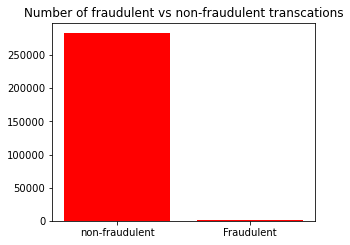

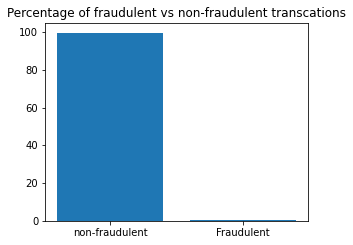

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

#bar plot for the number of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.title("Number of fraudulent vs non-fraudulent transcations")
plt.bar(['non-fraudulent','Fraudulent'],classes,color="r")

#bar plot for the percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(16,8))
plt.subplot(2,3,2)
plt.title("Percentage of fraudulent vs non-fraudulent transcations")
plt.bar(['non-fraudulent','Fraudulent'],[normal_share,fraud_share])

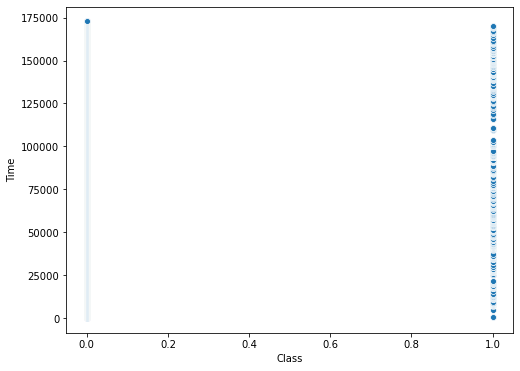

In [10]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(8,6))
sns.scatterplot(y='Time',x='Class',data=df)
plt.show()

In [11]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

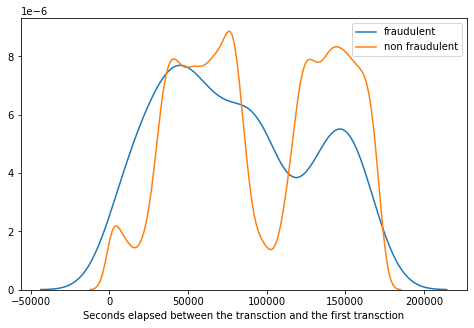

In [12]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

```Analysis```

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

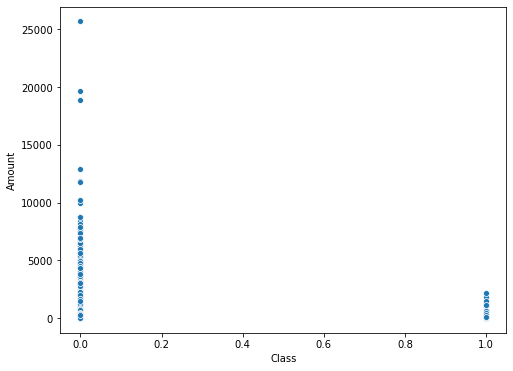

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(8,6))
sns.scatterplot(y='Amount',x='Class',data=df)
plt.show()

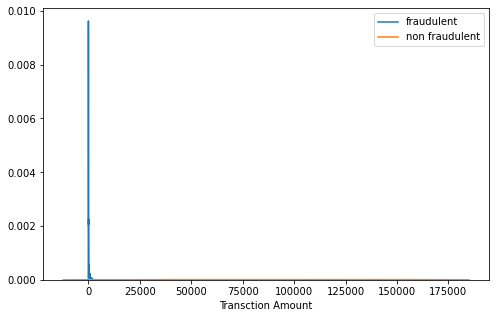

In [14]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show() 

```Analysis```

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.


In [15]:
# Drop unnecessary columns

In [16]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Splitting the data into train & test data

In [17]:
y= df["Class"]#class variable
X = df.drop(['Class'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 10,stratify=y)

In [19]:
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)
print('X_test size: ',X_test.shape)
print('y_test size: ',y_test.shape)

X_train size:  (199364, 29)
y_train size:  (199364,)
X_test size:  (85443, 29)
y_test size:  (85443,)


### Feature Scaling

We need to scale only the ```Amount``` column as all other columns are already scaled by the PCA transformation.

In [20]:
#scaling the variables
scaler = StandardScaler()
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [21]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
148059,-0.656386,1.424725,-0.374499,-0.268099,0.432709,-1.055896,0.737874,0.262591,-0.157333,-1.503518,...,-0.042349,0.081471,0.486126,-0.219454,-0.072756,-0.159109,0.584916,0.257623,0.202271,-0.297728
110272,-0.825579,-0.432325,0.066135,-1.993148,0.379293,0.735688,0.894906,0.031828,-1.542659,0.262563,...,-0.584245,-0.400461,-0.638548,0.257649,-1.710477,-0.176103,0.951044,0.028205,0.004047,0.273638
255089,1.966052,0.057479,-1.744361,1.222036,0.567858,-0.643665,0.521794,-0.222291,0.055143,0.435288,...,-0.274810,0.086272,0.364321,-0.066837,-0.405676,0.442932,-0.486842,-0.027070,-0.073031,-0.231128
29982,0.820990,-2.062937,-0.025251,-2.339499,-2.017082,-1.209201,-0.384134,-0.226652,1.328569,-0.898176,...,0.027024,-0.186063,-0.531803,-0.301085,0.373017,0.461993,-0.761989,0.041723,0.080679,0.903235
91450,0.898668,-0.038045,0.398146,1.372237,-0.330762,-0.519292,0.334188,-0.193017,-0.251740,-0.081831,...,0.183015,0.219000,0.460729,-0.178354,0.446530,0.549538,-0.290213,0.017285,0.048999,0.223258


#### Scaling the test set

##### We don't fit scaler on the test set. We only transform the test set.

In [22]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
130092,1.246306,-0.398784,0.896384,-0.718228,-1.272253,-0.841904,-0.619613,0.006119,1.926386,-1.059464,...,-0.170205,-0.020288,0.157578,-0.027289,0.390533,0.476666,-0.684279,0.089114,0.033810,-0.349430
97022,1.217100,0.363898,0.420396,2.164826,0.500177,1.201871,-0.225799,0.254172,-0.460598,0.655265,...,-0.049633,-0.413222,-1.094918,-0.082842,-1.427231,0.473843,-0.187665,0.014768,0.005476,-0.323119
242048,1.985662,0.184417,-1.533040,1.293855,0.435739,-0.877102,0.531196,-0.270525,-0.045579,0.431712,...,-0.307224,0.103983,0.494314,0.000262,0.020121,0.413865,-0.511442,-0.018550,-0.072130,-0.331288
192560,1.962537,-0.336480,-1.280755,0.255657,-0.046030,-0.678998,0.048936,-0.105643,0.486028,0.258019,...,-0.189964,-0.250900,-0.779983,0.255954,-0.437345,-0.333090,0.202095,-0.091105,-0.069138,-0.173259
236096,-2.384454,-1.542253,1.130605,-1.789261,-0.569513,-0.277345,-0.696311,-0.295568,-1.655852,2.024375,...,-1.421071,-0.410256,0.115018,-0.040955,-0.319864,0.429753,0.104782,-0.547959,0.254282,-0.069093


#### Preserve X_test & y_test to evaluate on the test data once you build the model

In [23]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

In [24]:
# plot the histogram of a variable from the dataset to see the skewness
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

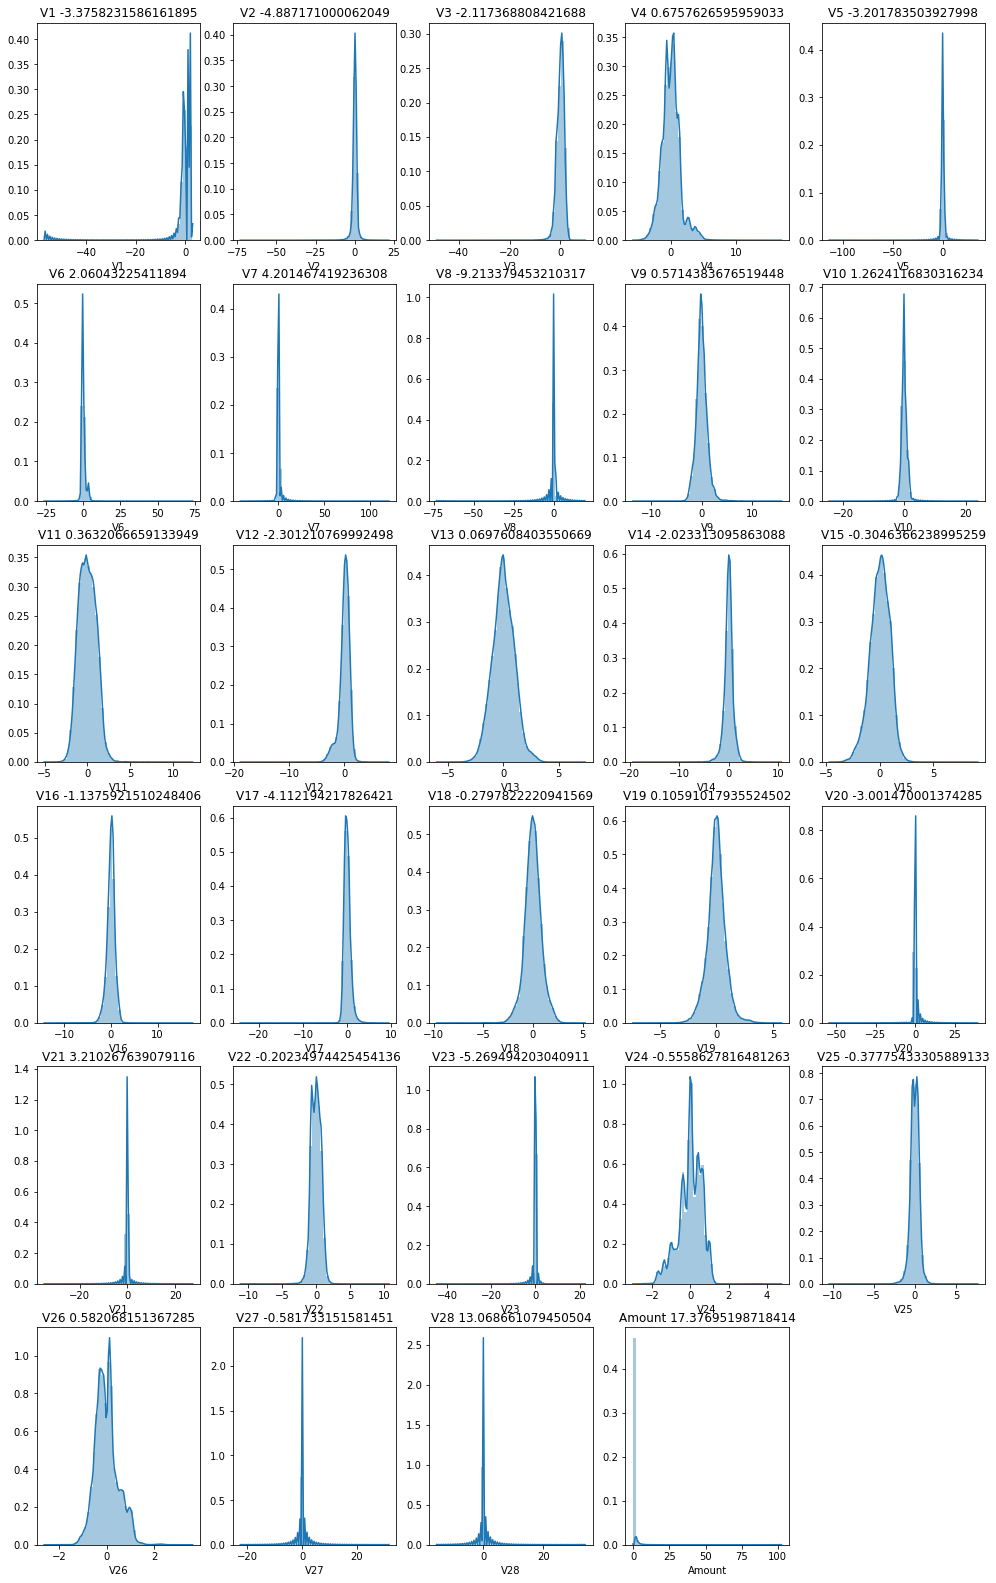

In [25]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [26]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)


In [27]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

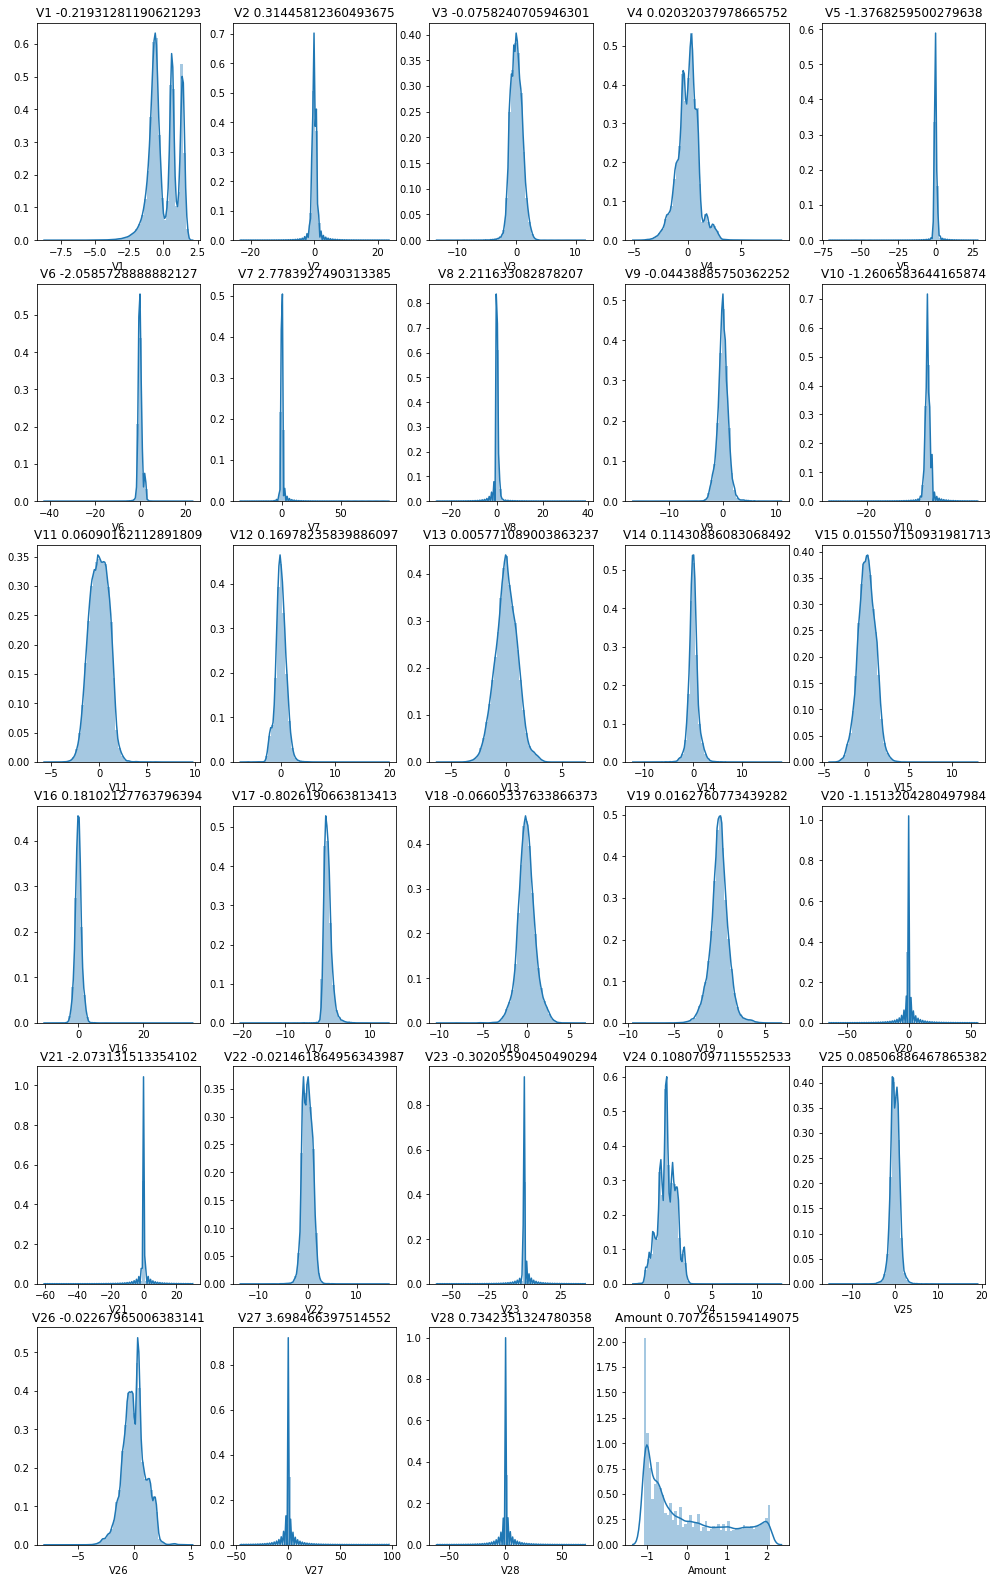

In [28]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

# Functions

In [29]:
def evaluation_metric(actual,predicted,pred_prob=None):
    print ("Recall/Sensitivity : %.4g" % recall_score(actual, predicted))
    print('confusion metrics :\n' , confusion_matrix(actual, predicted))
    print('Accuracy of model \n', accuracy_score(actual, predicted))
    print("AUC Score : %.4g" % roc_auc_score(actual, pred_prob))


In [30]:
def metrics(actual,predicted):
    confusion = confusion_matrix(actual, predicted)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity : %.4g' % (TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity : %.4g' % (TN / float(TN+FP)))
    # Calculate false postive rate - predicting fraud when customer does not have fraud
    print('FPR : %.4g' % (FP/ float(TN+FP)))
    # positive predictive value 
    print ('Positive predictive value : %.4g'%(TP / float(TP+FP)))
    # Negative predictive value
    print ('Negative predictive value : %.4g'%(TN / float(TN+ FN)))

In [31]:
# function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None #fpr, tpr, thresholds

# Model Building

# Model building on imbalanced data¶

### Metric selection for heavily imbalanced data

As we have seen that the data is heavily imbalanced, where only 0.17% transctions are fraudulent, we should not consider Accuracy as a good measure for evaluating the model. Because in the case of all the datapoints return a particular class(1/0) irrespective of any prediction, still the model will result more than 99% Accuracy.

Hence, we have to measure the ROC-AUC score for fair evaluation of the model. The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds. The default threshold of 0.5 is not always the ideal threshold to find the best classification label of the test point. Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. After determining the optimal threshold, we can calculate the F1 score of the classifier to measure the precision and recall at the selected threshold.



# Logistic RegressionCV 

In [446]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV #import the package
X_train_logreg = X_train.copy() 
y_train_logreg = y_train.copy()
X_test_logreg = X_test.copy()
y_test_logreg = y_test.copy()

print(X_train_logreg.shape)
print(y_train_logreg.shape)
print(X_test_logreg.shape)
print(y_test_logreg.shape)


(199364, 29)
(199364,)
(85443, 29)
(85443,)


In [447]:
num_C = [0.01, 0.1, 1, 10, 100, 1000]#--> list of values
cv_num = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
#5 #--> list of values

In [448]:
logreg_model = LogisticRegressionCV(penalty='l2',random_state=7)

In [449]:
param_grid = dict(Cs=num_C)

In [450]:
logreg_model_grid = GridSearchCV(estimator=logreg_model, 
                                 param_grid=param_grid,
                                 scoring= 'roc_auc',
                                 cv = cv_num,
                                 verbose = 1,
                                 n_jobs=-1,
                                 return_train_score=True)

In [451]:
logreg_model_grid.fit(X_train_logreg,y_train_logreg)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:  3.3min remaining:   56.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 13.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegressionCV(random_state=7), n_jobs=-1,
             param_grid={'Cs': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [452]:
#results on tunning the model
scores = logreg_model_grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Cs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.360203,0.010950,0.000000,0.000000,0.01,{'Cs': 0.01},NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
1,0.322971,0.046992,0.000000,0.000000,0.1,{'Cs': 0.1},NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN
2,5.001027,0.046347,0.056629,0.001136,1,{'Cs': 1},0.941406,0.967175,0.938565,0.949049,0.012869,4,0.957189,0.944419,0.947834,0.949814,0.005398
3,38.120872,1.082860,0.051185,0.014048,10,{'Cs': 10},0.971587,0.973318,0.977733,0.974213,0.002588,1,0.979112,0.977568,0.978607,0.978429,0.000643
4,192.225712,5.598981,0.045051,0.002500,100,{'Cs': 100},0.971607,0.973514,0.977310,0.974144,0.002370,2,0.978577,0.977615,0.979400,0.978531,0.000729


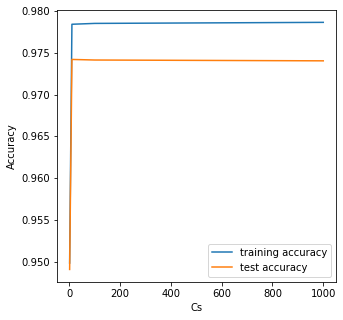

In [453]:
# plotting accuracies with Cs
plt.figure(figsize=(5, 5))
plt.plot(scores["param_Cs"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_Cs"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("Cs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [454]:
# Best score with best C
best_score = logreg_model_grid.best_score_
best_C = logreg_model_grid.best_params_['Cs']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9742127212816486 at C = 10


## Logistic regression with optimal C

In [458]:
# Instantiate the model with best C
logreg_cv = LogisticRegression(C=10)

In [459]:
# fitting the model
logreg_cv.fit(X_train_logreg,y_train_logreg)

LogisticRegression(C=10)

In [460]:
# predicts the fraud probability for train data
y_train_pred_logreg_prob = logreg_cv.predict_proba(X_train_logreg)[:,1]

y_train_pred_logreg_final = pd.DataFrame({'Fraud':y_train_logreg.values, 'Fraud_Prob':y_train_pred_logreg_prob})
y_train_pred_logreg_final['CustID'] = y_train_logreg.index

y_train_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.000640,148059
1,0,0.000088,110272
2,0,0.000311,255089
3,0,0.000131,29982
4,0,0.000119,91450


In [461]:
# predicting Fraud for train data
# Creating new column 'predicted' with 1 if fraud_Prob > 0.5 else 0
y_train_pred_logreg_final['predicted'] = y_train_pred_logreg_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_logreg_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,0.000640,148059,0
1,0,0.000088,110272,0
2,0,0.000311,255089,0
3,0,0.000131,29982,0
4,0,0.000119,91450,0


In [462]:
#calling evalutaion metric funtion created earlier to see the performance
evaluation_metric(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.predicted, y_train_pred_logreg_final.Fraud_Prob)

Recall/Sensitivity : 0.6366
confusion metrics :
 [[198991     29]
 [   125    219]]
Accuracy of model 
 0.9992275435886118
AUC Score : 0.9767


In [463]:
#performance on the train data
metrics(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.predicted)

Sensitivity : 0.6366
Specificity : 0.9999
FPR : 0.0001457
Positive predictive value : 0.8831
Negative predictive value : 0.9994


```On imblanced dataset```

```Recall/Sensitivity``` on the train data : 63.25%

```Specificity``` on the train data : 99.99%

```Accuracy``` on the train data : 99.92%

### Plotting ROC Curve

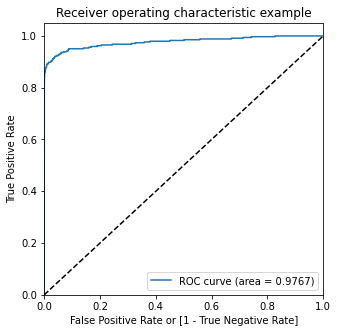

In [464]:
draw_roc(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.Fraud_Prob)

#### FInding Optimal Cutoff

In [465]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_logreg_final[i]= y_train_pred_logreg_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000640,148059,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000088,110272,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000311,255089,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000131,29982,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000119,91450,0,1,0,0,0,0,0,0,0,0,0


In [466]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001725  1.000000  0.000000
0.1   0.1  0.999288  0.808140  0.999618
0.2   0.2  0.999278  0.750000  0.999709
0.3   0.3  0.999303  0.726744  0.999774
0.4   0.4  0.999293  0.691860  0.999824
0.5   0.5  0.999228  0.636628  0.999854
0.6   0.6  0.999187  0.607558  0.999864
0.7   0.7  0.999142  0.578488  0.999869
0.8   0.8  0.999097  0.549419  0.999874
0.9   0.9  0.998987  0.485465  0.999874


<Figure size 504x504 with 0 Axes>

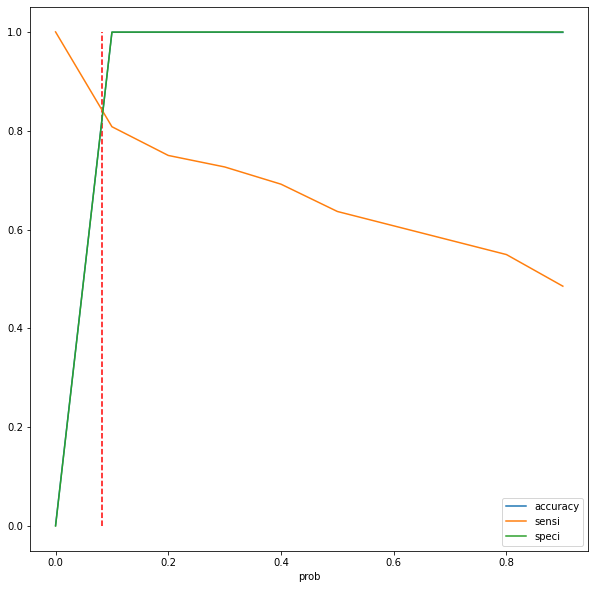

In [467]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(7, 7))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.082, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

 From the curve above, 0.082 is the optimum point, since we are interested mostly on specificity/Recall hence taking cutoff as 0.05

In [468]:
# Final cutoff points and predictions by the model
# decreasing the final cuttoff value to increase specificity/recall as per business requirement
y_train_pred_logreg_final['final_predicted'] = y_train_pred_logreg_final.Fraud_Prob.map( lambda x: 1 if x > 0.05 else 0)

y_train_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000640,148059,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000088,110272,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000311,255089,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000131,29982,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000119,91450,0,1,0,0,0,0,0,0,0,0,0,0


In [469]:
# Let's check the overall accuracy on the train dat after deciding the cutoff.
evaluation_metric(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.final_predicted, y_train_pred_logreg_final.Fraud_Prob)

Recall/Sensitivity : 0.8285
confusion metrics :
 [[198889    131]
 [    59    285]]
Accuracy of model 
 0.999046969362573
AUC Score : 0.9767


In [470]:
#calling evalutaion metric funtion created earlier to see the performance
metrics(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.final_predicted)

Sensitivity : 0.8285
Specificity : 0.9993
FPR : 0.0006582
Positive predictive value : 0.6851
Negative predictive value : 0.9997


```On Imblanced data```

```Recall/Sensitivity``` on the train data after deciding the cutoff : 82.85%

```Specificity``` on the train data after deciding the cutoff : 99.93%

```Accuracy``` on the train data after deciding the cutoff: 99.90%

### Predictions on the testset

In [471]:
# predicts the fraud probability for test data
y_test_pred_logreg_prob = logreg_cv.predict_proba(X_test_logreg)[:,1]

y_test_pred_logreg_final = pd.DataFrame({'Fraud':y_test_logreg.values, 'Fraud_Prob':y_test_pred_logreg_prob})
y_test_pred_logreg_final['CustID'] = y_test_logreg.index
y_test_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.000093,130092
1,0,0.000093,97022
2,0,0.000253,242048
3,0,0.000059,192560
4,0,0.000634,236096


In [472]:
# putiing final cutoff points and making predictions by the model on the data
y_test_pred_logreg_final['final_predicted'] = y_test_pred_logreg_final.Fraud_Prob.map( lambda x: 1 if x > 0.05 else 0)

y_test_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,0.000093,130092,0
1,0,0.000093,97022,0
2,0,0.000253,242048,0
3,0,0.000059,192560,0
4,0,0.000634,236096,0


In [473]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
evaluation_metric(y_test_pred_logreg_final.Fraud, y_test_pred_logreg_final.final_predicted,y_test_pred_logreg_final.Fraud_Prob )

Recall/Sensitivity : 0.8108
confusion metrics :
 [[85239    56]
 [   28   120]]
Accuracy of model 
 0.9990168884519505
AUC Score : 0.9837


In [474]:
#calling evalutaion metric funtion created earlier to see the performance
metrics(y_test_pred_logreg_final.Fraud, y_test_pred_logreg_final.final_predicted)

Sensitivity : 0.8108
Specificity : 0.9993
FPR : 0.0006565
Positive predictive value : 0.6818
Negative predictive value : 0.9997


```Train data values```


```Recall/Sensitivity``` on the train data after deciding the cutoff : 82.85%

```Specificity``` on the train data after deciding the cutoff : 99.93%

```Accuracy``` on the train data after deciding the cutoff: 99.90%

```Test data values```

```Recall/Sensitivity``` on the test data after deciding the cutoff : 81.08%

```Specificity``` on the test data after deciding the cutoff : 99.93%

```Accuracy``` on the test data after deciding the cutoff: 99.90%



we also got good AUC score so we have a good model

# SVM

In [32]:
X_train_svm = X_train.copy() 
y_train_svm = y_train.copy()
X_test_svm = X_test.copy()
y_test_svm = y_test.copy()

print(X_train_svm.shape)
print(y_train_svm.shape)
print(X_test_svm.shape)
print(y_test_svm.shape)
from sklearn.svm import SVC

(199364, 29)
(199364,)
(85443, 29)
(85443,)


In [34]:
# creating svc object
svc = SVC()

# fitting model on svc
svc.fit(X_train_svm,y_train_svm)

SVC()

In [35]:
# predicting the values of y_train
y_train_pred_svc = svc.predict(X_train_svm)
y_train_pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
#checking the performance the following metrics
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_svm, y_train_pred_svc))
print('confusion metrics :\n' , confusion_matrix(y_train_svm, y_train_pred_svc))
print('Accuracy of model \n',accuracy_score(y_train_svm, y_train_pred_svc))


Recall/Sensitivity : 0.8169
confusion metrics :
 [[199014      6]
 [    63    281]]
Accuracy of model 
 0.9996538994000923


In [37]:
# predicting the values of y_test
y_test_pred_svc = svc.predict(X_test_svm)
y_test_pred_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
print ("Recall/Sensitivity : %.4g" % recall_score(y_test_svm, y_test_pred_svc))
print('confusion metrics :\n' , confusion_matrix(y_test_svm, y_test_pred_svc))
print('Accuracy of model \n',accuracy_score(y_test_svm, y_test_pred_svc))

Recall/Sensitivity : 0.6959
confusion metrics :
 [[85289     6]
 [   45   103]]
Accuracy of model 
 0.999403110845827


# Hyper Parameter Training

In [40]:
# paraneter tuning with non linear kernal
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm1 = SVC(probability=True)

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        verbose = 3,
                        n_jobs=-1,
                       return_train_score=True) 
model_cv.fit(X_train_svm, y_train_svm)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed: 29.0min remaining: 36.9min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed: 38.4min remaining:  9.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 70.6min finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='f1', verbose=3)

In [41]:
#score of the modle
scores = model_cv.cv_results_

In [42]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3822.990551,321.273891,3.393221,0.062446,0.1,{'C': 0.1},0.386364,0.296296,0.359551,0.250000,...,0.326735,0.048299,5,0.381503,0.373178,0.389535,0.376812,0.376812,0.379568,0.005641
1,1150.978537,101.619594,4.974948,0.120124,1,{'C': 1},0.737705,0.733945,0.735043,0.813559,...,0.747170,0.034106,2,0.896282,0.888889,0.896414,0.880478,0.895464,0.891505,0.006181
2,802.277192,26.149258,3.817840,0.066571,10,{'C': 10},0.803279,0.756757,0.752137,0.845528,...,0.774659,0.045073,1,0.954373,0.958333,0.960302,0.964218,0.970149,0.961475,0.005375
3,587.320449,18.975692,3.044489,0.215748,100,{'C': 100},0.793651,0.719298,0.699187,0.818898,...,0.745337,0.051033,3,0.987109,0.988971,0.992674,0.992674,0.990859,0.990457,0.002164
4,362.714232,54.809371,1.558080,0.427010,1000,{'C': 1000},0.768000,0.707965,0.709677,0.803150,...,0.733410,0.045414,4,0.992674,0.994516,0.994516,0.994516,0.994536,0.994151,0.000739


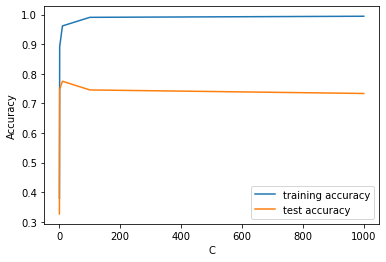

In [43]:
# plotting accuracies with C
plt.figure()
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [44]:
# best params 
model_cv.best_params_

{'C': 10}

we are choosing the C = 0.1 because as c increases the model is overfitting 

In [33]:
# fitting the final model
svc_final = SVC(C=0.1,kernel='rbf',probability=True)
svc_final.fit(X_train_svm,y_train_svm)

SVC(C=0.1, probability=True)

In [34]:
# predicting the values of y_train
y_train_pred_svc_final_prob = svc_final.predict_proba(X_train_svm)[:,1]
y_train_pred_svc_final_prob

array([0.00073121, 0.00072664, 0.00074829, ..., 0.00068955, 0.00075467,
       0.00082713])

In [35]:
print("AUC Score : %.4g" %roc_auc_score(y_train_svm, y_train_pred_svc_final_prob))


AUC Score : 0.9989


In [36]:
# predicts the fraud probability for train data
#y_train_pred_logreg_prob = logreg_model.predict_proba(X_train_pca_logreg)[:,1]

y_train_pred_svm_final = pd.DataFrame({'Fraud':y_train_svm.values, 'Fraud_Prob':y_train_pred_svc_final_prob})
y_train_pred_svm_final['CustID'] = y_train_svm.index
y_train_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.000731,148059
1,0,0.000727,110272
2,0,0.000748,255089
3,0,0.000738,29982
4,0,0.000717,91450


In [37]:
# predicting fraud for train data
# Creating new column 'predicted' with 1 if fraud_Prob > 0.5 else 0
y_train_pred_svm_final['predicted'] = y_train_pred_svm_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_svm_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,0.000731,148059,0
1,0,0.000727,110272,0
2,0,0.000748,255089,0
3,0,0.000738,29982,0
4,0,0.000717,91450,0


In [38]:
# cllaing the evalution metrics to check the performance on the train data
evaluation_metric(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.predicted, y_train_pred_svm_final.Fraud_Prob)

Recall/Sensitivity : 0.6453
confusion metrics :
 [[198995     25]
 [   122    222]]
Accuracy of model 
 0.9992626552436749
AUC Score : 0.9989


In [39]:
#confusion matrix
metrics(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.predicted)

Sensitivity : 0.6453
Specificity : 0.9999
FPR : 0.0001256
Positive predictive value : 0.8988
Negative predictive value : 0.9994


```On imblanced dataset```

```Recall/Sensitivity``` on the train data : 64.53%

```Specificity``` on the train data : 99.99%

```Accuracy``` on the train data : 99.92%

#### Plotting ROC Curve

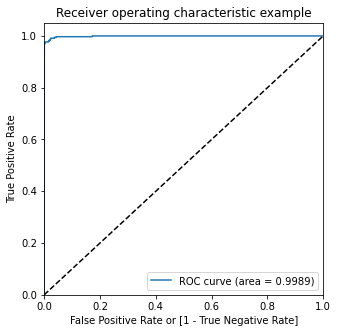

In [40]:
#roc curve
draw_roc(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.Fraud_Prob)

### Finding Optimal Cutoff

In [41]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_svm_final[i]= y_train_pred_svm_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000731,148059,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000727,110272,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000748,255089,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000738,29982,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000717,91450,0,1,0,0,0,0,0,0,0,0,0


In [42]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_svm_final.Fraud, y_train_pred_svm_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001725  1.000000  0.000000
0.1   0.1  0.999338  0.703488  0.999849
0.2   0.2  0.999283  0.671512  0.999849
0.3   0.3  0.999263  0.656977  0.999854
0.4   0.4  0.999278  0.656977  0.999869
0.5   0.5  0.999263  0.645349  0.999874
0.6   0.6  0.999248  0.636628  0.999874
0.7   0.7  0.999233  0.627907  0.999874
0.8   0.8  0.999192  0.604651  0.999874
0.9   0.9  0.999117  0.558140  0.999879


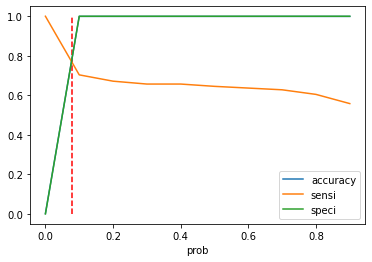

In [43]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.08, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [50]:
# deciding final cutoff point based on the bussiness requirement and prediction by the model
y_train_pred_svm_final['final_predicted'] = y_train_pred_svm_final.Fraud_Prob.map( lambda x: 1 if x > 0.03 else 0)

y_train_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000731,148059,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000727,110272,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000748,255089,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000738,29982,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000717,91450,0,1,0,0,0,0,0,0,0,0,0,0


In [51]:
#performance on the train data
evaluation_metric(y_train_pred_svm_final.Fraud,y_train_pred_svm_final.final_predicted,y_train_pred_svm_final.Fraud_Prob)

Recall/Sensitivity : 0.7471
confusion metrics :
 [[198987     33]
 [    87    257]]
Accuracy of model 
 0.999398085913204
AUC Score : 0.9989


In [52]:
#confusion matrix results
metrics(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.final_predicted)

Sensitivity : 0.7471
Specificity : 0.9998
FPR : 0.0001658
Positive predictive value : 0.8862
Negative predictive value : 0.9996


```On Imblanced data```

```Recall/Sensitivity``` on the train data after deciding the cutoff : 74.71%

```Specificity``` on the train data after deciding the cutoff : 99.98%

```Accuracy``` on the train data after deciding the cutoff: 99.93%

### Predictions on the testset

In [53]:
# predicts the fraud probability for train data
y_test_pred_svm_prob = svc_final.predict_proba(X_test_svm)[:,1]

y_test_pred_svm_final = pd.DataFrame({'Fraud':y_test_svm.values, 'Fraud_Prob':y_test_pred_svm_prob})
y_test_pred_svm_final['CustID'] = y_test_svm.index
y_test_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.000840,130092
1,0,0.000785,97022
2,0,0.000803,242048
3,0,0.000672,192560
4,0,0.000713,236096


In [54]:
# earlier decided final cutoff point and predictions by the model on the test data
y_test_pred_svm_final['final_predicted'] = y_test_pred_svm_final.Fraud_Prob.map( lambda x: 1 if x > 0.03 else 0)

y_test_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,0.000840,130092,0
1,0,0.000785,97022,0
2,0,0.000803,242048,0
3,0,0.000672,192560,0
4,0,0.000713,236096,0


In [55]:
# performance of the model on the test data
evaluation_metric(y_test_pred_svm_final.Fraud, y_test_pred_svm_final.final_predicted, y_test_pred_svm_final.Fraud_Prob)

Recall/Sensitivity : 0.6554
confusion metrics :
 [[85283    12]
 [   51    97]]
Accuracy of model 
 0.9992626663389628
AUC Score : 0.9529


In [56]:
# confusion matrix for the test data
metrics(y_test_pred_svm_final.Fraud, y_test_pred_svm_final.final_predicted)

Sensitivity : 0.6554
Specificity : 0.9999
FPR : 0.0001407
Positive predictive value : 0.8899
Negative predictive value : 0.9994


```Train data values```

```Recall/Sensitivity``` on the train data after deciding the cutoff : 74.71%

```Specificity``` on the train data after deciding the cutoff : 99.98%

```Accuracy``` on the train data after deciding the cutoff: 99.93%

```Test data values```

```Recall/Sensitivity``` on the test data after deciding the cutoff : 65.54%

```Specificity``` on the test data after deciding the cutoff : 99.99%

```Accuracy``` on the test data after deciding the cutoff: 99.92%



# Random Forest

In [92]:
X_train_rf = X_train.copy() 
y_train_rf = y_train.copy()
X_test_rf = X_test.copy()
y_test_rf = y_test.copy()

print(X_train_rf.shape)
print(y_train_rf.shape)
print(X_test_rf.shape)
print(y_test_rf.shape)


(199364, 29)
(199364,)
(85443, 29)
(85443,)


In [93]:
rfc = RandomForestClassifier()

In [94]:
rfc.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

In [95]:
#predicting the performance before hypertunning
predictions = rfc.predict(X_train_rf)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
#performance on the test data
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_rf, predictions))
print('confusion metrics :\n' , confusion_matrix(y_train_rf, predictions))
print('Accuracy of model \n',accuracy_score(y_train_rf, predictions))
print("AUC Score : %.4g" % roc_auc_score(y_train_rf, rfc.predict_proba(X_train_rf)[:,1]))


Recall/Sensitivity : 1
confusion metrics :
 [[199020      0]
 [     0    344]]
Accuracy of model 
 1.0
AUC Score : 1


In [97]:
#classification report
print("Calssification Report:\n", classification_report(y_train_rf,predictions))

Calssification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [98]:
# prediction on testset
y_test_pred = rfc.predict(X_test_rf)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
evaluation_metric(y_test_rf, y_test_pred,rfc.predict_proba(X_test_rf)[:,1])

Recall/Sensitivity : 0.7635
confusion metrics :
 [[85288     7]
 [   35   113]]
Accuracy of model 
 0.9995084442259752
AUC Score : 0.9442


since by using the default parameter the model is overfitting hence lets tune the hyperparameters to get a good model

# HyperParameter Tunning

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [101]:
# specifying n_folds
n_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4) #5

#parameters to build model on
parameters = { "max_depth" : range(2,20,5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,parameters,
                 cv = n_folds,
                 scoring = "accuracy",
                  n_jobs=-1,
                  verbose=3,
                 return_train_score = True)
rf.fit(X_train_rf,y_train_rf)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:   28.3s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  2.5min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  3.7min remaining:   24.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy', verbose=3)

In [102]:
#results on tunning the model with max_depth
scores = rf.cv_results_

In [103]:
#dataframe of results after tunning max_depth
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.723040,0.184324,0.278058,0.011690,2,{'max_depth': 2},0.999122,0.999197,0.999097,0.999047,...,0.999087,0.000075,4,0.999116,0.999091,0.999085,0.999116,0.999147,0.999111,0.000022
1,90.241413,0.498172,0.365538,0.007653,7,{'max_depth': 7},0.999498,0.999498,0.999448,0.999599,...,0.999483,0.000074,3,0.999661,0.999661,0.999680,0.999655,0.999668,0.999665,0.000009
2,140.994070,2.449372,0.390532,0.035622,12,{'max_depth': 12},0.999498,0.999498,0.999523,0.999624,...,0.999529,0.000049,1,0.999768,0.999730,0.999743,0.999730,0.999743,0.999743,0.000014
3,142.172543,14.667158,0.319073,0.016182,17,{'max_depth': 17},0.999523,0.999523,0.999523,0.999599,...,0.999518,0.000056,2,0.999937,0.999875,0.999912,0.999856,0.999912,0.999898,0.000029


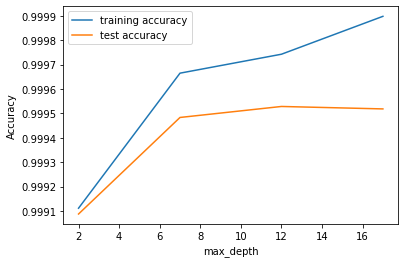

In [104]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


we can see that best ```max_depth``` is between ```7 to 12```

# Tunning  n_estimators

In [106]:
# specifying n_folds
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

#parameters to build model on
parameters = { "n_estimators" : range(100,400,100)}

rf = RandomForestClassifier(max_depth = 8)

rf = GridSearchCV(rf,parameters,
                 cv = n_folds,
                 scoring = "accuracy",
                  n_jobs=-1,
                  verbose=3,
                 return_train_score = True)
rf.fit(X_train_rf,y_train_rf)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  1.2min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  2.1min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(max_depth=8), n_jobs=-1,
             param_grid={'n_estimators': range(100, 400, 100)},
             return_train_score=True, scoring='accuracy', verbose=3)

In [107]:
#scores of the model after tunning the model on the n_estimators  
scores = rf.cv_results_

In [108]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,67.129640,0.214309,0.562368,0.025510,100,{'n_estimators': 100},0.999564,0.999443,0.999503,0.999503,0.000049,1,0.999722,0.999707,0.999684,0.999704,0.000015
1,120.479671,0.193012,0.864376,0.032099,200,{'n_estimators': 200},0.999564,0.999443,0.999458,0.999488,0.000054,2,0.999722,0.999684,0.999684,0.999697,0.000018
2,163.438920,0.269411,1.078230,0.016045,300,{'n_estimators': 300},0.999579,0.999428,0.999458,0.999488,0.000065,2,0.999714,0.999699,0.999692,0.999702,0.000009


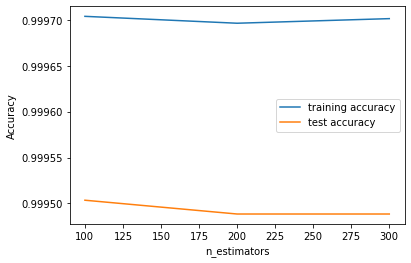

In [109]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


we can that best ```n_estimtor``` is between ```200 t0 300```

# Tunning min_sample_leaf 

In [110]:
#number of fold
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

#parameters the model build on
parameters = {"min_samples_leaf": range(50,300,50)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,parameters,
                cv = n_folds,
                 scoring="accuracy",
                  n_jobs=-1,
                  verbose=3,
                 return_train_score = True)
rf.fit(X_train_rf,y_train_rf)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.0min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  2.2min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy', verbose=3)

In [111]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,131.563345,1.835977,0.577977,0.022108,50,{'min_samples_leaf': 50},0.999293,0.999112,0.999037,0.999147,0.000107,1,0.999142,0.999202,0.999165,0.999170,0.000025
1,124.026066,1.346504,0.744617,0.038966,100,{'min_samples_leaf': 100},0.999082,0.998992,0.998932,0.999002,0.000062,2,0.998992,0.999029,0.999029,0.999017,0.000018
2,118.758183,1.323909,0.838739,0.007658,150,{'min_samples_leaf': 150},0.998886,0.998345,0.998796,0.998676,0.000237,3,0.998826,0.998465,0.998849,0.998713,0.000176
3,115.180510,1.730936,0.822723,0.007364,200,{'min_samples_leaf': 200},0.998270,0.998270,0.998285,0.998275,0.000007,4,0.998277,0.998277,0.998270,0.998275,0.000004
4,63.790607,0.235890,0.457790,0.007693,250,{'min_samples_leaf': 250},0.998270,0.998270,0.998285,0.998275,0.000007,4,0.998277,0.998277,0.998270,0.998275,0.000004


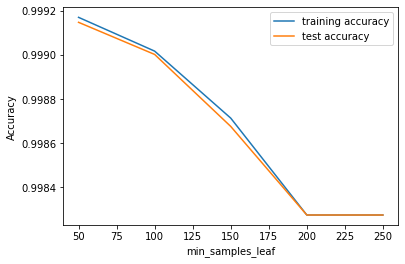

In [112]:
#plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


we can see  best ```min_samples_leaf``` are between 50 to 100 

# Max Features

In [113]:
# GridSearchCV to find optimal max_features


# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  n_jobs=-1,
                  verbose=3,
                  return_train_score=True)
rf.fit(X_train_rf, y_train_rf)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  2.2min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.6min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(max_depth=8), n_jobs=-1,
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [114]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,66.282114,0.427934,0.671716,0.022091,4,{'max_features': 4},0.999579,0.999383,0.999428,0.999463,0.000084,5,0.999676,0.999684,0.999669,0.999676,0.000006
1,129.482388,0.492056,0.645682,0.007365,8,{'max_features': 8},0.999549,0.999458,0.999518,0.999508,0.000038,2,0.999737,0.999729,0.999714,0.999727,0.000009
2,210.259321,0.911876,0.529107,0.054511,14,{'max_features': 14},0.999503,0.999503,0.999518,0.999508,0.000007,2,0.999752,0.999729,0.999722,0.999734,0.000013
3,272.554330,0.272752,0.437398,0.012726,20,{'max_features': 20},0.999488,0.999473,0.999518,0.999493,0.000019,4,0.999752,0.999752,0.999722,0.999742,0.000014
4,274.886013,0.254765,0.348874,0.007386,24,{'max_features': 24},0.999488,0.999488,0.999549,0.999508,0.000028,1,0.999752,0.999744,0.999722,0.999739,0.000013


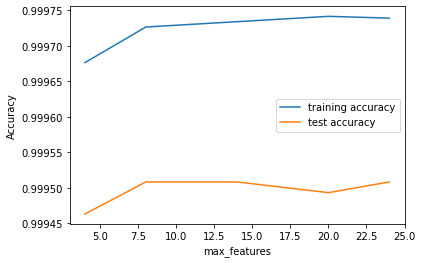

In [115]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


we can see best ```max_features``` are between 8 to 13

# Grid Search To Find Optimal HyperParameters

In [116]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,8,12],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 8,13]
}
# Create a based model
c = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = c, n_jobs = -1,verbose = 3)
grid_search.fit(X_train_rf,y_train_rf)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 75.4min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 162.2min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 291.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 12], 'max_features': [5, 8, 13],
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [117]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9991924314554702 using {'max_depth': 12, 'max_features': 13, 'min_samples_leaf': 50, 'min_samples_split': 400, 'n_estimators': 200}


we get a accuracy of 99.99% using following parameter values:

- `max_depth` : 12
- `max_features` : 13
- `min_samples_leaf` : 50
- `min_samples_split` : 400
- `n_estimators` : 200

In [118]:
#number of folds
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

#rf = RandomForestClassifier()

#final RandomForestClasssifier model with all parameters
final_rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=50, 
                             min_samples_split=400,
                             max_features=13,
                             n_estimators=200,
                                 n_jobs = -1,verbose = 3 ,
                                  class_weight="balanced",
                                  random_state=100)


In [119]:
#fittingbthe model on the final model built 
final_rfc.fit(X_train_rf,y_train_rf)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.6s


building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   31.8s


building tree 116 of 200
building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.0min finished


RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=13,
                       min_samples_leaf=50, min_samples_split=400,
                       n_estimators=200, n_jobs=-1, random_state=100,
                       verbose=3)

In [120]:
# predictions  on the train data
predictions = final_rfc.predict_proba(X_train_rf)[:,1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.4s finished


In [121]:
#predited array values
predictions

array([0.01875598, 0.00027402, 0.00011249, ..., 0.00100712, 0.00033038,
       0.00992655])

In [122]:
#creating data frame and a column 
y_train_pred_rf_final = pd.DataFrame({'Fraud':y_train_rf.values, 'Fraud_Prob':predictions})
y_train_pred_rf_final['CustID'] = y_train_rf.index
y_train_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.018756,148059
1,0,0.000274,110272
2,0,0.000112,255089
3,0,0.013786,29982
4,0,0.000869,91450


In [123]:
y_train_pred_rf_final['predicted'] = y_train_pred_rf_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_rf_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,0.018756,148059,0
1,0,0.000274,110272,0
2,0,0.000112,255089,0
3,0,0.013786,29982,0
4,0,0.000869,91450,0


In [124]:
#calling the evalution metric code to see the performance on the train data after deciding a cutoff value
evaluation_metric(y_train_pred_rf_final.Fraud,y_train_pred_rf_final.predicted,y_train_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 0.9855
confusion metrics :
 [[198736    284]
 [     5    339]]
Accuracy of model 
 0.9985503902409663
AUC Score : 0.9998


In [125]:
metrics(y_train_pred_rf_final.Fraud,y_train_pred_rf_final.predicted)

Sensitivity : 0.9855
Specificity : 0.9986
FPR : 0.001427
Positive predictive value : 0.5441
Negative predictive value : 1


In [ ]:
# calling the ROC curve
draw_roc(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.Fraud_Prob)

```On imblanced dataset```

```Recall/Sensitivity``` on the train data : 98.55%

```Specificity``` on the train data : 99.86%

```Accuracy``` on the train data : 99.85%

#### FInding Optimal Cutoff

In [126]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_rf_final[i]= y_train_pred_rf_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.018756,148059,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000274,110272,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000112,255089,0,1,0,0,0,0,0,0,0,0,0
3,0,0.013786,29982,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000869,91450,0,1,0,0,0,0,0,0,0,0,0


In [127]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_rf_final.Fraud, y_train_pred_rf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001921  1.000000  0.000196
0.1   0.1  0.960143  1.000000  0.960074
0.2   0.2  0.989271  1.000000  0.989252
0.3   0.3  0.995651  1.000000  0.995644
0.4   0.4  0.997362  1.000000  0.997357
0.5   0.5  0.998550  0.985465  0.998573
0.6   0.6  0.999017  0.924419  0.999146
0.7   0.7  0.999258  0.880814  0.999462
0.8   0.8  0.999403  0.845930  0.999668
0.9   0.9  0.999448  0.799419  0.999794


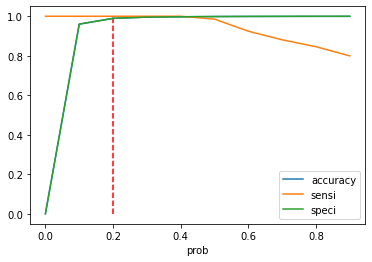

In [154]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.2, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

### From the curve above, 0.21 is the optimum point to take it as a cutoff probability.

In [146]:
# Final cutoff points and predictions by the model 
y_train_pred_rf_final['final_predicted'] = y_train_pred_rf_final.Fraud_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.018756,148059,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000274,110272,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000112,255089,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.013786,29982,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000869,91450,0,1,0,0,0,0,0,0,0,0,0,0


In [147]:
# Let's check the overall accuracy on the train data after the cutoff value decided.
accuracy_score(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.final_predicted)

0.9892708814028611

In [148]:
#checking the performance
evaluation_metric(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.final_predicted ,y_train_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 1
confusion metrics :
 [[196881   2139]
 [     0    344]]
Accuracy of model 
 0.9892708814028611
AUC Score : 0.9998


In [149]:
# calling for confudion matrix
metrics(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.final_predicted)

Sensitivity : 1
Specificity : 0.9893
FPR : 0.01075
Positive predictive value : 0.1385
Negative predictive value : 1


```On Imblanced data```

```Recall/Sensitivity``` on the train data after deciding the cutoff : 100%

```Specificity``` on the train data after deciding the cutoff : 98.93%

```Accuracy``` on the train data after deciding the cutoff: 98.92%

### Predictions on the testset

In [155]:
# predicts the fraud probability for test data
y_test_pred_rf_prob =  final_rfc.predict_proba(X_test_rf)[:,1]

y_test_pred_rf_final = pd.DataFrame({'Fraud':y_test_rf.values, 'Fraud_Prob':y_test_pred_rf_prob})
y_test_pred_rf_final['CustID'] = y_test_rf.index
y_test_pred_rf_final.head()

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.2s finished


,Fraud,Fraud_Prob,CustID
0,0,0.001347,130092
1,0,0.015197,97022
2,0,0.000112,242048
3,0,0.008244,192560
4,0,0.112527,236096


In [156]:
# FInal cutoff points and predictions by the model
y_test_pred_rf_final['final_predicted'] = y_test_pred_rf_final.Fraud_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_test_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,0.001347,130092,0
1,0,0.015197,97022,0
2,0,0.000112,242048,0
3,0,0.008244,192560,0
4,0,0.112527,236096,0


In [157]:
#checking the performance on the test data
evaluation_metric(y_test_pred_rf_final.Fraud,y_test_pred_rf_final.final_predicted,y_test_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 0.9054
confusion metrics :
 [[84352   943]
 [   14   134]]
Accuracy of model 
 0.9887995505775781
AUC Score : 0.9817


In [158]:
#checkingbthe performance mterics on the test data
metrics(y_test_pred_rf_final.Fraud, y_test_pred_rf_final.final_predicted)

Sensitivity : 0.9054
Specificity : 0.9889
FPR : 0.01106
Positive predictive value : 0.1244
Negative predictive value : 0.9998


```On Imblanced data```

```Recall/Sensitivity``` on the train data after deciding the cutoff : 100%

```Specificity``` on the train data after deciding the cutoff : 98.93%

```Accuracy``` on the train data after deciding the cutoff: 98.92%




```Recall/Sensitivity``` on the test data after deciding the cutoff : 90.54%

```Specificity``` on the test data after deciding the cutoff : 98.89%

```Accuracy``` on the test data after deciding the cutoff: 98.87%

# xgboost

In [57]:
# creating copy

X_train_xg = X_train.copy() 
y_train_xg = y_train.copy()
X_test_xg = X_test.copy()
y_test_xg = y_test.copy()

print(X_train_xg.shape)
print(y_train_xg.shape)
print(X_test_xg.shape)
print(y_test_xg.shape)


(199364, 29)
(199364,)
(85443, 29)
(85443,)


In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [59]:
xgb.fit(X_train_xg,y_train_xg)

[00:47:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
#predicting the performance before hypertunning
predictions = xgb.predict(X_train_xg)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
#performance on the test data
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_xg, predictions))
print('confusion metrics :\n' , confusion_matrix(y_train_xg, predictions))
print('Accuracy of model \n',accuracy_score(y_train_xg, predictions))
print("AUC Score : %.4g" % roc_auc_score(y_train_xg, xgb.predict_proba(X_train_xg)[:,1]))


Recall/Sensitivity : 1
confusion metrics :
 [[199020      0]
 [     0    344]]
Accuracy of model 
 1.0
AUC Score : 1


In [63]:
#classification report
print("Calssification Report:\n", classification_report(y_train_xg,predictions))

Calssification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



In [65]:
# prediction on testset
y_test_pred = xgb.predict(X_test_xg)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
evaluation_metric(y_test_xg, y_test_pred,xgb.predict_proba(X_test_xg)[:,1])

Recall/Sensitivity : 0.8041
confusion metrics :
 [[85286     9]
 [   29   119]]
Accuracy of model 
 0.9995552590615966
AUC Score : 0.9792


since by using the default parameter the model is overfitting hence lets tine the hyperparameters to get a good model

# HyperParameter Tunning

In [68]:
# hyperparameter tuning with XGBoost

# creating a StratifiedKFold object 
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=3, n_estimators=200)

# set up GridSearchCV()
model_cv_xgb = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_xgb.fit(X_train_xg, y_train_xg)    

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[00:50:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:50:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  6.3min finished


[00:56:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
 

In [69]:
# cv results
cv_results_xgb = pd.DataFrame(model_cv_xgb.cv_results_)
cv_results_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.770737,0.034517,0.078106,0.000000e+00,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.978559,0.970089,0.972274,0.973641,0.003590,1,0.999835,0.999799,0.999810,0.999815,0.000015
1,15.311669,0.378573,0.078106,4.495664e-07,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.970599,0.968048,0.974453,0.971034,0.002633,2,0.999988,0.999966,0.999985,0.999980,0.000010
2,19.269381,0.073273,0.078107,4.052337e-07,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.964569,0.967953,0.977536,0.970019,0.005492,4,0.999989,0.999983,0.999970,0.999981,0.000008
3,10.270052,0.070587,0.083314,7.364291e-03,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.967378,0.962659,0.982320,0.970786,0.008380,3,0.999985,0.999998,0.999996,0.999993,0.000005
4,14.977073,0.102659,0.083314,7.364572e-03,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.972074,0.962069,0.968564,0.967569,0.004144,5,1.000000,1.000000,1.000000,1.000000,0.000000


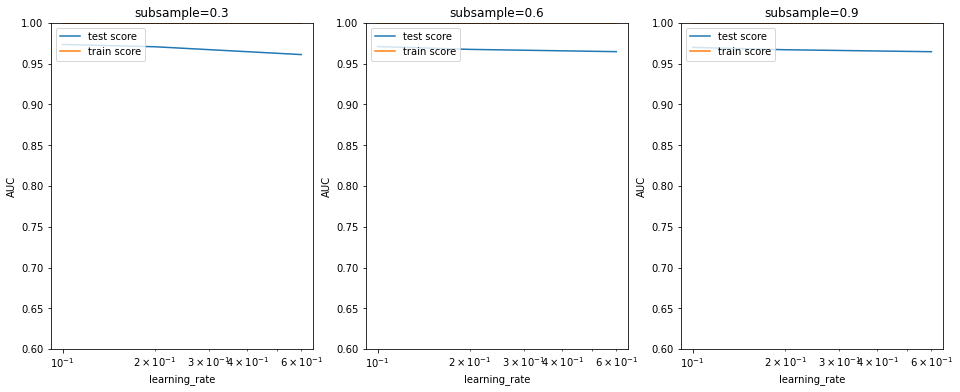

In [70]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results_xgb[cv_results_xgb['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [71]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv_xgb.best_score_,'using',model_cv_xgb.best_params_)

We can get accuracy of 0.9736410010883997 using {'learning_rate': 0.1, 'subsample': 0.3}


we get a accuracy of 97.36% using following parameter values:

- `subsample`: 0.3
- `learning_rate`: 0.1

In [72]:
# chosen hyperparameters

params = {'learning_rate': 0.1,
          'max_depth': 3, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model = XGBClassifier(params = params)
xgb_model.fit(X_train_xg, y_train_xg)

[00:57:32] WARNING: ..\src\learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:57:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              params={'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [73]:
# predictions  on the train data
predictions = xgb_model.predict_proba(X_train_xg)[:,1]

In [74]:
#predited array values
predictions

array([6.6913508e-06, 4.1577296e-06, 1.9346035e-06, ..., 2.7449391e-07,
       9.3745831e-07, 3.0004761e-05], dtype=float32)

In [75]:
#creating data frame and a column 
y_train_pred_xg_final = pd.DataFrame({'Fraud':y_train_xg.values, 'Fraud_Prob':predictions})
y_train_pred_xg_final['CustID'] = y_train_xg.index
y_train_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,6.691351e-06,148059
1,0,4.157730e-06,110272
2,0,1.934603e-06,255089
3,0,9.840242e-06,29982
4,0,6.682217e-07,91450


In [76]:
y_train_pred_xg_final['predicted'] = y_train_pred_xg_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_xg_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,6.691351e-06,148059,0
1,0,4.157730e-06,110272,0
2,0,1.934603e-06,255089,0
3,0,9.840242e-06,29982,0
4,0,6.682217e-07,91450,0


In [77]:
#calling the evalution metric code to see the performance on the train data after deciding a cutoff value
evaluation_metric(y_train_pred_xg_final.Fraud,y_train_pred_xg_final.predicted,y_train_pred_xg_final.Fraud_Prob)

Recall/Sensitivity : 1
confusion metrics :
 [[199020      0]
 [     0    344]]
Accuracy of model 
 1.0
AUC Score : 1


In [78]:
metrics(y_train_pred_xg_final.Fraud,y_train_pred_xg_final.predicted)

Sensitivity : 1
Specificity : 1
FPR : 0
Positive predictive value : 1
Negative predictive value : 1


```Recall/Sensitivity``` on the train data  : 100%

```Specificity``` on the train data  : 100%

```Accuracy``` on the train data : 100%

### Plotting ROC Curve

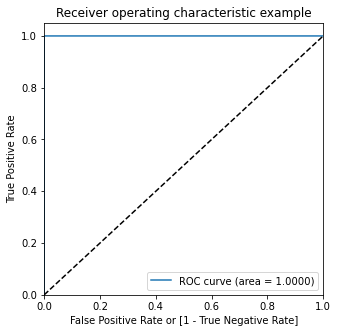

In [79]:
# calling the ROC curve
draw_roc(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.Fraud_Prob)

the area under the curve is high and ROC Area is 1.0 hence we can go with the model

### Finding Optimal Cutoff

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_xg_final[i]= y_train_pred_xg_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,6.691351e-06,148059,0,1,0,0,0,0,0,0,0,0,0
1,0,4.157730e-06,110272,0,1,0,0,0,0,0,0,0,0,0
2,0,1.934603e-06,255089,0,1,0,0,0,0,0,0,0,0,0
3,0,9.840242e-06,29982,0,1,0,0,0,0,0,0,0,0,0
4,0,6.682217e-07,91450,0,1,0,0,0,0,0,0,0,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_xg_final.Fraud, y_train_pred_xg_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi  speci
0.0   0.0  0.001725  1.000000    0.0
0.1   0.1  1.000000  1.000000    1.0
0.2   0.2  1.000000  1.000000    1.0
0.3   0.3  1.000000  1.000000    1.0
0.4   0.4  1.000000  1.000000    1.0
0.5   0.5  1.000000  1.000000    1.0
0.6   0.6  1.000000  1.000000    1.0
0.7   0.7  1.000000  1.000000    1.0
0.8   0.8  1.000000  1.000000    1.0
0.9   0.9  0.999970  0.982558    1.0


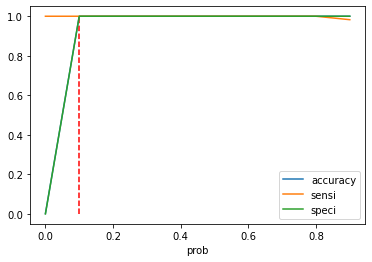

In [82]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.1, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

### From the curve above, 0.05 is the optimum point to take it as a cutoff probability.

In [84]:
# Final cutoff points and predictions by the model 
y_train_pred_xg_final['final_predicted'] = y_train_pred_xg_final.Fraud_Prob.map( lambda x: 1 if x > 0.05 else 0)

y_train_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,6.691351e-06,148059,0,1,0,0,0,0,0,0,0,0,0,0
1,0,4.157730e-06,110272,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1.934603e-06,255089,0,1,0,0,0,0,0,0,0,0,0,0
3,0,9.840242e-06,29982,0,1,0,0,0,0,0,0,0,0,0,0
4,0,6.682217e-07,91450,0,1,0,0,0,0,0,0,0,0,0,0


In [85]:
# Let's check the overall accuracy on the train data after the cutoff value decided.
accuracy_score(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.final_predicted)

0.9999699042956602

In [86]:
#checking the performance
evaluation_metric(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.final_predicted ,y_train_pred_xg_final.Fraud_Prob)

Recall/Sensitivity : 1
confusion metrics :
 [[199014      6]
 [     0    344]]
Accuracy of model 
 0.9999699042956602
AUC Score : 1


In [87]:
# calling for confudion matrix
metrics(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.final_predicted)

Sensitivity : 1
Specificity : 1
FPR : 3.015e-05
Positive predictive value : 0.9829
Negative predictive value : 1


```Recall/Sensitivity``` on the train data after deciding the cutoff : 100%

```Specificity``` on the train data after deciding the cutoff : 100%

```Accuracy``` on the train data after deciding the cutoff: 99.99%

### Predictions on the testset

In [88]:
# predicts the fraud probability for test data
y_test_pred_xg_prob =  xgb_model.predict_proba(X_test_xg)[:,1]

y_test_pred_xg_final = pd.DataFrame({'Fraud':y_test_xg.values, 'Fraud_Prob':y_test_pred_xg_prob})
y_test_pred_xg_final['CustID'] = y_test_xg.index
y_test_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,2.865236e-05,130092
1,0,3.085759e-05,97022
2,0,5.318909e-07,242048
3,0,3.703691e-07,192560
4,0,5.985429e-06,236096


In [89]:
# FInal cutoff points and predictions by the model
y_test_pred_xg_final['final_predicted'] = y_test_pred_xg_final.Fraud_Prob.map( lambda x: 1 if x > 0.05 else 0)

y_test_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,2.865236e-05,130092,0
1,0,3.085759e-05,97022,0
2,0,5.318909e-07,242048,0
3,0,3.703691e-07,192560,0
4,0,5.985429e-06,236096,0


In [90]:
#checking the performance on the test data
evaluation_metric(y_test_pred_xg_final.Fraud,y_test_pred_xg_final.final_predicted,y_test_pred_xg_final.Fraud_Prob)

Recall/Sensitivity : 0.8378
confusion metrics :
 [[85274    21]
 [   24   124]]
Accuracy of model 
 0.9994733330992591
AUC Score : 0.9792


In [91]:
#checkingbthe performance mterics on the test data
metrics(y_test_pred_xg_final.Fraud, y_test_pred_xg_final.final_predicted)

Sensitivity : 0.8378
Specificity : 0.9998
FPR : 0.0002462
Positive predictive value : 0.8552
Negative predictive value : 0.9997


```XGBoost Model summary```

- `Train set`

 - Accuracy = 0.99
 - Sensitivity = 1.0
 - Specificity = 1.0
 - ROC-AUC = 1.0

- `Test set`
 - Accuracy = 0.99
 - Sensitivity = 0.83
 - Specificity = 0.99
 - ROC-AUC = 0.97

### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Selcting based on AUC-ROC Score and Sensitivity

In [160]:
# clf = #initialise the model with optimum hyperparameters

#rf = RandomForestClassifier()

#final RandomForestClasssifier model with all parameters
clf = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=50, 
                             min_samples_split=400,
                             max_features=13,
                             n_estimators=200,
                             n_jobs = -1,verbose = 3 ,
                             class_weight="balanced",
                             random_state=100)

clf.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    5.2s


building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   41.1s


building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200b

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished


RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=13,
                       min_samples_leaf=50, min_samples_split=400,
                       n_estimators=200, n_jobs=-1, random_state=100,
                       verbose=3)

In [ ]:
#print --> #print the evaluation score on the X_test by choosing the best evaluation metric

In [161]:
# predicts the fraud probability for test data
y_test_pred_rf_prob =  clf.predict_proba(X_test_rf)[:,1]

y_test_pred_rf_final = pd.DataFrame({'Fraud':y_test_rf.values, 'Fraud_Prob':y_test_pred_rf_prob})
y_test_pred_rf_final['CustID'] = y_test_rf.index
y_test_pred_rf_final.head()

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.2s finished


,Fraud,Fraud_Prob,CustID
0,0,0.001347,130092
1,0,0.015197,97022
2,0,0.000112,242048
3,0,0.008244,192560
4,0,0.112527,236096


In [162]:
# FInal cutoff points and predictions by the model
y_test_pred_rf_final['final_predicted'] = y_test_pred_rf_final.Fraud_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_test_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,0.001347,130092,0
1,0,0.015197,97022,0
2,0,0.000112,242048,0
3,0,0.008244,192560,0
4,0,0.112527,236096,0


In [163]:
#checking the performance on the test data
evaluation_metric(y_test_pred_rf_final.Fraud,y_test_pred_rf_final.final_predicted,y_test_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 0.9054
confusion metrics :
 [[84352   943]
 [   14   134]]
Accuracy of model 
 0.9887995505775781
AUC Score : 0.9817


In [164]:
#checkingbthe performance mterics on the test data
metrics(y_test_pred_rf_final.Fraud, y_test_pred_rf_final.final_predicted)

Sensitivity : 0.9054
Specificity : 0.9889
FPR : 0.01106
Positive predictive value : 0.1244
Negative predictive value : 0.9998


Recall/Sensitivity on the test data after deciding the cutoff : 90.54%

Specificity on the test data after deciding the cutoff : 98.89%

Accuracy on the test data after deciding the cutoff: 98.87%

AUCROC on the test data after deciding the cutoff: ```98.17%```


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 10
3rd Top var = 12


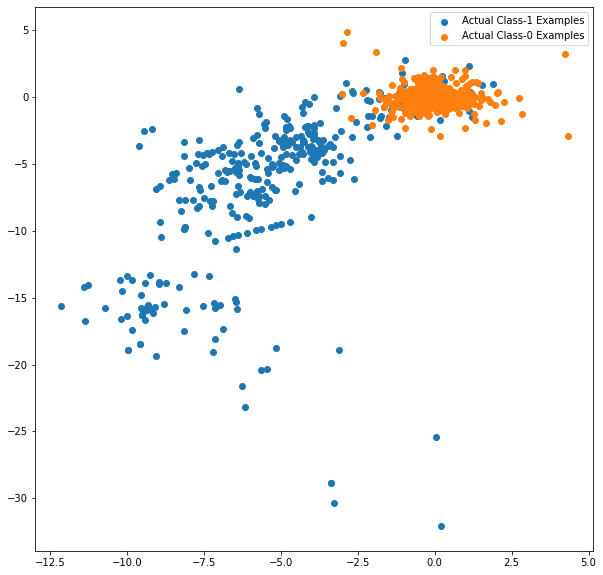

In [165]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

# Balancing Using SMOTE 

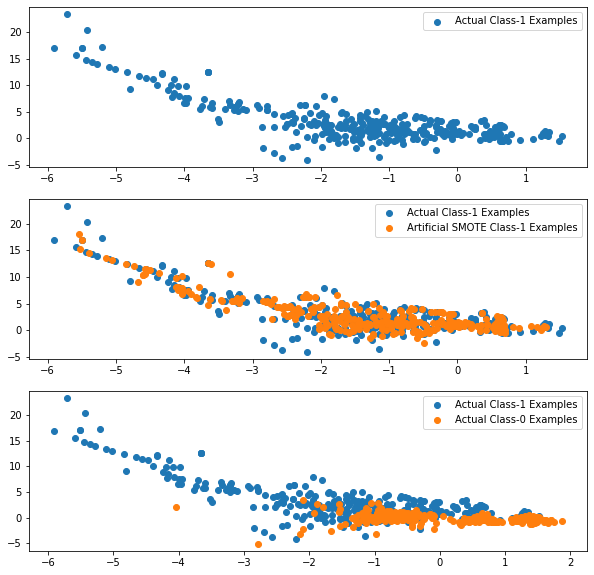

In [183]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [184]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 199020 

After OverSampling, the shape of train_X: (398040, 29)
After OverSampling, the shape of train_y: (398040,) 

After OverSampling, counts of label '1': 199020
After OverSampling, counts of label '0': 199020


In [185]:
#balancing the test data using smote

X_test_smote, y_test_smote = sm.fit_resample(X_test, y_test)

In [186]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_test_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_test_smote.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_test_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_smote==0)))

Before OverSampling, counts of label '1': 148
Before OverSampling, counts of label '0': 85295 

After OverSampling, the shape of train_X: (170590, 29)
After OverSampling, the shape of train_y: (170590,) 

After OverSampling, counts of label '1': 85295
After OverSampling, counts of label '0': 85295


# Logistic RegressionCV Using SMOTE Technique

In [526]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV #import the package
X_train_logreg_sm = X_train_smote.copy() 
y_train_logreg_sm = y_train_smote.copy()
X_test_logreg_sm = X_test_smote.copy()
y_test_logreg_sm = y_test_smote.copy()

print(X_train_logreg_sm.shape)
print(y_train_logreg_sm.shape)
print(X_test_logreg_sm.shape)
print(y_test_logreg_sm.shape)


(398040, 29)
(398040,)
(170590, 29)
(170590,)


In [228]:
num_C = [0.01, 0.1, 1, 10, 100, 1000]#--> list of values
cv_num = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
#5 #--> list of values

In [229]:
logreg_model = LogisticRegressionCV(penalty='l2',random_state=7)

In [230]:
param_grid = dict(Cs=num_C)

In [231]:
logreg_model_smote = GridSearchCV(estimator=logreg_model, 
                                 param_grid=param_grid,
                                 scoring= 'roc_auc',
                                 cv = cv_num,
                                 verbose = 1,
                                 n_jobs=-1,
                                 return_train_score=True)

In [177]:
logreg_model_smote.fit(X_train_logreg_sm,y_train_logreg_sm)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:  3.7min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 16.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegressionCV(random_state=7), n_jobs=-1,
             param_grid={'Cs': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [179]:
#results on tunning the model
scores = logreg_model_smote.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Cs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.529099,0.013673,0.000000,0.000000,0.01,{'Cs': 0.01},NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
1,0.543546,0.020358,0.000000,0.000000,0.1,{'Cs': 0.1},NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN
2,11.142193,0.296136,0.139959,0.004098,1,{'Cs': 1},0.984918,0.984890,0.984842,0.984883,0.000031,4,0.984883,0.984919,0.984867,0.984890,0.000022
3,48.535396,0.933637,0.097074,0.018824,10,{'Cs': 10},0.986161,0.986373,0.986048,0.986194,0.000135,3,0.986160,0.986367,0.986077,0.986201,0.000122
4,216.785483,0.290191,0.073471,0.003673,100,{'Cs': 100},0.986278,0.986294,0.986204,0.986259,0.000039,1,0.986278,0.986289,0.986229,0.986265,0.000026


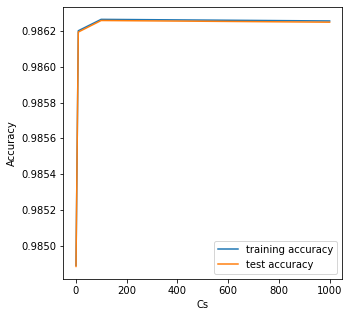

In [180]:
# plotting accuracies with Cs
plt.figure(figsize=(5, 5))
plt.plot(scores["param_Cs"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_Cs"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("Cs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [181]:
# Best score with best C
best_score = logreg_model_smote.best_score_
best_C = logreg_model_smote.best_params_['Cs']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9862586874660816 at C = 100


## Logistic regression with optimal C 

In [185]:
# Instantiate the model with best C
logreg_sm = LogisticRegression(C=100)

In [186]:
# fitting the model
logreg_sm.fit(X_train_logreg_sm,y_train_logreg_sm)

LogisticRegression(C=100)

In [188]:
# predicts the fraud probability for train data
y_train_pred_logreg_prob = logreg_sm.predict_proba(X_train_logreg_sm)[:,1]

y_train_pred_logreg_final = pd.DataFrame({'Fraud':y_train_logreg_sm.values, 'Fraud_Prob':y_train_pred_logreg_prob})
y_train_pred_logreg_final['CustID'] = y_train_logreg_sm.index

y_train_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.071754,0
1,0,0.004165,1
2,0,0.139810,2
3,0,0.014617,3
4,0,0.093758,4


In [189]:
# predicting Fraud for train data
# Creating new column 'predicted' with 1 if fraud_Prob > 0.5 else 0
y_train_pred_logreg_final['predicted'] = y_train_pred_logreg_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_logreg_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,0.071754,0,0
1,0,0.004165,1,0
2,0,0.139810,2,0
3,0,0.014617,3,0
4,0,0.093758,4,0


In [190]:
#calling evalutaion metric funtion created earlier to see the performance
evaluation_metric(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.predicted, y_train_pred_logreg_final.Fraud_Prob)

Recall/Sensitivity : 0.9184
confusion metrics :
 [[193773   5247]
 [ 16243 182777]]
Accuracy of model 
 0.9460104512109335
AUC Score : 0.9863


In [194]:
#performance on the train data
metrics(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.predicted)

Sensitivity : 0.9184
Specificity : 0.9736
FPR : 0.02636
Positive predictive value : 0.9721
Negative predictive value : 0.9227


## Ploting auc roc curve

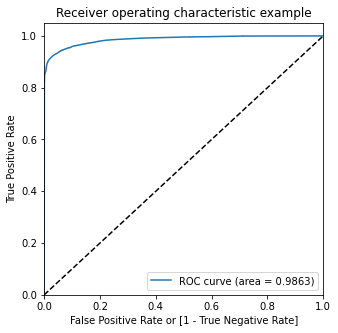

In [195]:
draw_roc(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.Fraud_Prob)

```On blanced dataset using SMOTE```

```AUC Score``` on the train data : 98.63%

```Recall/Sensitivity``` on the train data : 91.84%

```Specificity``` on the train data : 97.36%

```Accuracy``` on the train data : 94.6%

### Finding optimal cutoff

In [196]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_logreg_final[i]= y_train_pred_logreg_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.071754,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.004165,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.139810,2,0,1,1,0,0,0,0,0,0,0,0
3,0,0.014617,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.093758,4,0,1,0,0,0,0,0,0,0,0,0


In [197]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.882019  0.983092  0.780947
0.2   0.2  0.929907  0.958356  0.901457
0.3   0.3  0.941923  0.941252  0.942594
0.4   0.4  0.944913  0.928585  0.961240
0.5   0.5  0.946010  0.918385  0.973636
0.6   0.6  0.945377  0.908331  0.982424
0.7   0.7  0.942707  0.897141  0.988273
0.8   0.8  0.936647  0.881293  0.992001
0.9   0.9  0.927500  0.858828  0.996171


<Figure size 360x360 with 0 Axes>

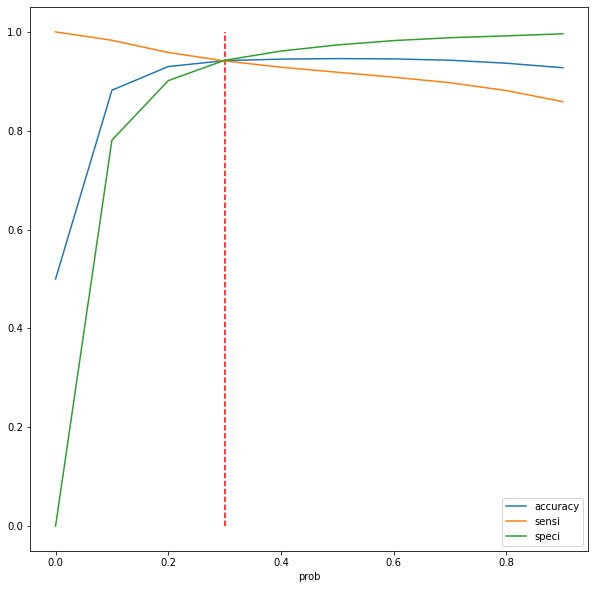

In [200]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(5,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

 From the curve above, 0.3 is the optimum point, since we are interested mostly on specificity/Recall hence taking cutoff as 0.2

In [210]:
# Final cutoff points and predictions by the model
# decreasing the final cuttoff value to increase specificity/recall as per business requirement
y_train_pred_logreg_final['final_predicted'] = y_train_pred_logreg_final.Fraud_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.071754,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.004165,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.139810,2,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.014617,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.093758,4,0,1,0,0,0,0,0,0,0,0,0,0


In [211]:
# Let's check the overall accuracy on the train dat after deciding the cutoff.
evaluation_metric(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.final_predicted, y_train_pred_logreg_final.Fraud_Prob)

Recall/Sensitivity : 0.9584
confusion metrics :
 [[179408  19612]
 [  8288 190732]]
Accuracy of model 
 0.9299065420560748
AUC Score : 0.9863


In [212]:
#calling evalutaion metric funtion created earlier to see the performance
metrics(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.final_predicted)

Sensitivity : 0.9584
Specificity : 0.9015
FPR : 0.09854
Positive predictive value : 0.9068
Negative predictive value : 0.9558


```On blanced data using SMOTE```

```AUC Score``` on the train data after deciding the cutoff: 98.63%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 95.84%

```Specificity``` on the train data after deciding the cutoff : 90.15%

```Accuracy``` on the train data after deciding the cutoff: 92.9%

# Predictions on test data

In [232]:
# predicts the fraud probability for test data
y_test_pred_logreg_prob = logreg_sm.predict_proba(X_test_logreg_sm)[:,1]

y_test_pred_logreg_final = pd.DataFrame({'Fraud':y_test_logreg_sm.values, 'Fraud_Prob':y_test_pred_logreg_prob})
y_test_pred_logreg_final['CustID'] = y_test_logreg_sm.index
y_test_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.039542,0
1,0,0.060634,1
2,0,0.117287,2
3,0,0.039900,3
4,0,0.022973,4


In [233]:
# putiing final cutoff points and making predictions by the model on the data
y_test_pred_logreg_final['final_predicted'] = y_test_pred_logreg_final.Fraud_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_test_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,0.039542,0,0
1,0,0.060634,1,0
2,0,0.117287,2,0
3,0,0.039900,3,0
4,0,0.022973,4,0


In [234]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
evaluation_metric(y_test_pred_logreg_final.Fraud, y_test_pred_logreg_final.final_predicted,y_test_pred_logreg_final.Fraud_Prob )

Recall/Sensitivity : 0.9774
confusion metrics :
 [[76906  8389]
 [ 1931 83364]]
Accuracy of model 
 0.9395040740957852
AUC Score : 0.987


In [235]:
#calling evalutaion metric funtion created earlier to see the performance
metrics(y_test_pred_logreg_final.Fraud, y_test_pred_logreg_final.final_predicted)

Sensitivity : 0.9774
Specificity : 0.9016
FPR : 0.09835
Positive predictive value : 0.9086
Negative predictive value : 0.9755


```Train data values```

```AUC Score``` on the train data after deciding the cutoff : 98.63%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 95.84%

```Specificity``` on the train data after deciding the cutoff : 90.15%

```Accuracy``` on the train data after deciding the cutoff: 92.99%

```Test data values```

```AUC Score``` on the test data after deciding the cutoff : 98.7%

```Recall/Sensitivity``` on the test data after deciding the cutoff : 97.74%

```Specificity``` on the test data after deciding the cutoff : 90.16%

```Accuracy``` on the test data after deciding the cutoff: 93.95%



we also got good ```AUC score``` so we have a good model

# SVM using SMOTE Technique

In [37]:
X_train_svm_sm = X_train_smote.copy() 
y_train_svm_sm = y_train_smote.copy()
X_test_svm_sm = X_test_smote.copy()
y_test_svm_sm = y_test_smote.copy()

print(X_train_svm_sm.shape)
print(y_train_svm_sm.shape)
print(X_test_svm_sm.shape)
print(y_test_svm_sm.shape)


(398040, 29)
(398040,)
(170590, 29)
(170590,)


In [38]:
# creating svc object
svc = SVC()

# fitting model on svc
svc.fit(X_train_svm_sm,y_train_svm_sm)

SVC()

In [39]:
# predicting the values of y_train
y_train_pred_svc_sm = svc.predict(X_train_svm_sm)
y_train_pred_svc_sm

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [40]:
#checking the performance the following metrics on train
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_svm_sm, y_train_pred_svc_sm))
print('confusion metrics :\n' , confusion_matrix(y_train_svm_sm, y_train_pred_svc_sm))
print('Accuracy of model \n',accuracy_score(y_train_svm_sm, y_train_pred_svc_sm))


Recall/Sensitivity : 0.9836
confusion metrics :
 [[197529   1491]
 [  3266 195754]]
Accuracy of model 
 0.9880489398050447


In [43]:
# predicting the values of y_test
y_test_pred_svc_sm = svc.predict(X_test_svm_sm)
y_test_pred_svc_sm

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [44]:
#checking the performance the following metrics on test
print ("Recall/Sensitivity : %.4g" % recall_score(y_test_svm_sm, y_test_pred_svc_sm))
print('confusion metrics :\n' , confusion_matrix(y_test_svm_sm, y_test_pred_svc_sm))
print('Accuracy of model \n',accuracy_score(y_test_svm_sm, y_test_pred_svc_sm))

Recall/Sensitivity : 0.887
confusion metrics :
 [[84631   664]
 [ 9640 75655]]
Accuracy of model 
 0.93959786622897


Model is overfitting, lets try with hyper parameters tunning

# Hyper Parameter Tuning 

In [45]:
# paraneter tuning with non linear kernal
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

cv_ = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

svm1 = SVC(probability=True)

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', 
                        cv = cv_, 
                        verbose = 3,
                        n_jobs=-1,
                       return_train_score=True) 
model_cv.fit(X_train_svm_sm, y_train_svm_sm)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 73.1min remaining: 201.0min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 113.9min remaining: 56.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 157.1min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='f1', verbose=3)

In [46]:
#score of the modle
scores = model_cv.cv_results_

In [47]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8898.235735,42.756300,163.189787,0.375107,0.1,{'C': 0.1},0.962734,0.962906,0.963700,0.963113,0.000421,5,0.963186,0.963389,0.963097,0.963224,0.000122
1,6417.754847,0.167805,136.526098,0.396103,1,{'C': 1},0.984635,0.984192,0.984378,0.984401,0.000182,4,0.984364,0.984385,0.984809,0.984520,0.000205
2,4025.951082,13.464329,120.578761,1.961148,10,{'C': 10},0.995542,0.994960,0.995645,0.995382,0.000302,3,0.995571,0.995494,0.995479,0.995515,0.000040
3,2732.688493,29.474444,31.159309,0.515561,100,{'C': 100},0.998690,0.998660,0.998788,0.998713,0.000055,2,0.998927,0.998916,0.998901,0.998915,0.000011
4,2275.576697,40.248318,8.976320,0.441436,1000,{'C': 1000},0.999330,0.999337,0.999360,0.999342,0.000013,1,0.999631,0.999657,0.999582,0.999623,0.000031


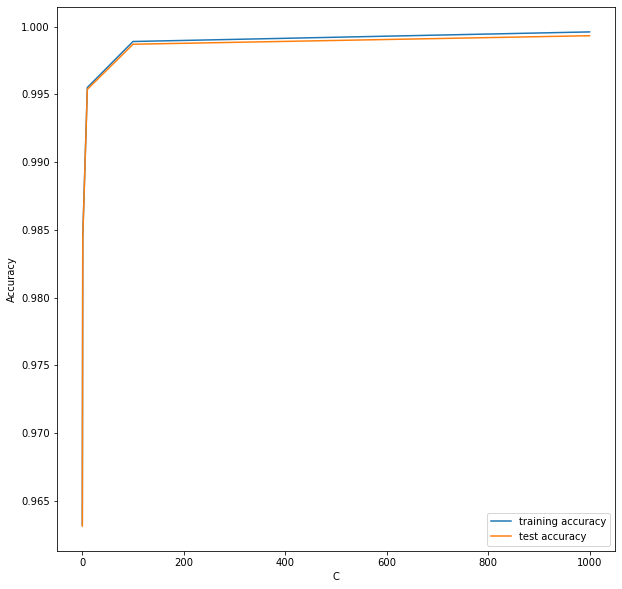

In [48]:
# plotting accuracies with C
plt.figure()
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
# best params 
model_cv.best_params_

{'C': 1000}

In [102]:
# fitting the final model
svc_final_sm = SVC(C=10,kernel='rbf',probability=True)
svc_final_sm.fit(X_train_svm_sm,y_train_svm_sm)

SVC(C=10, probability=True)

In [151]:
# predicting the values of y_train
y_train_pred_svc_final_prob = svc_final_sm.predict_proba(X_train_svm_sm)[:,1]
y_train_pred_svc_final_prob

array([1.55555794e-06, 1.00000010e-07, 1.28885214e-07, ...,
       9.86375520e-01, 1.00000000e+00, 1.00000000e+00])

In [152]:
print("AUC Score : %.4g" %roc_auc_score(y_train_svm_sm, y_train_pred_svc_final_prob))


AUC Score : 0.9999


In [153]:
# predicts the fraud probability for train data
#y_train_pred_logreg_prob = logreg_model.predict_proba(X_train_pca_logreg)[:,1]

y_train_pred_svm_final = pd.DataFrame({'Fraud':y_train_svm_sm.values, 'Fraud_Prob':y_train_pred_svc_final_prob})
y_train_pred_svm_final['CustID'] = y_train_svm_sm.index
y_train_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID
0,0,1.555558e-06,0
1,0,1.000000e-07,1
2,0,1.288852e-07,2
3,0,3.080306e-04,3
4,0,1.000000e-07,4


In [154]:
# predicting fraud for train data
# Creating new column 'predicted' with 1 if fraud_Prob > 0.5 else 0
y_train_pred_svm_final['predicted'] = y_train_pred_svm_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_svm_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,1.555558e-06,0,0
1,0,1.000000e-07,1,0
2,0,1.288852e-07,2,0
3,0,3.080306e-04,3,0
4,0,1.000000e-07,4,0


In [155]:
# cllaing the evalution metrics to check the performance on the train data
evaluation_metric(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.predicted, y_train_pred_svm_final.Fraud_Prob)

Recall/Sensitivity : 0.997
confusion metrics :
 [[198269    751]
 [   590 198430]]
Accuracy of model 
 0.9966309918601146
AUC Score : 0.9999


In [156]:
#confusion matrix
metrics(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.predicted)

Sensitivity : 0.997
Specificity : 0.9962
FPR : 0.003773
Positive predictive value : 0.9962
Negative predictive value : 0.997


```On imblanced dataset```

```AUC Score``` on the train data : 100%

```Recall/Sensitivity``` on the train data : 100%

```Specificity``` on the train data : 99.96%

```Accuracy``` on the train data : 99.97%

#### Plotting ROC Curve

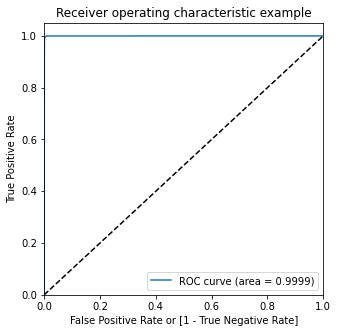

In [157]:
#roc curve
draw_roc(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.Fraud_Prob)

### Finding Optimal Cutoff

In [158]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_svm_final[i]= y_train_pred_svm_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.555558e-06,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1.000000e-07,1,0,1,0,0,0,0,0,0,0,0,0
2,0,1.288852e-07,2,0,1,0,0,0,0,0,0,0,0,0
3,0,3.080306e-04,3,0,1,0,0,0,0,0,0,0,0,0
4,0,1.000000e-07,4,0,1,0,0,0,0,0,0,0,0,0


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_svm_final.Fraud, y_train_pred_svm_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.994604  0.999683  0.989524
0.2   0.2  0.995872  0.998814  0.992930
0.3   0.3  0.996362  0.998231  0.994493
0.4   0.4  0.996578  0.997618  0.995538
0.5   0.5  0.996631  0.997035  0.996227
0.6   0.6  0.996598  0.996392  0.996804
0.7   0.7  0.996443  0.995558  0.997327
0.8   0.8  0.996392  0.994784  0.998000
0.9   0.9  0.995335  0.992126  0.998543


<Figure size 360x360 with 0 Axes>

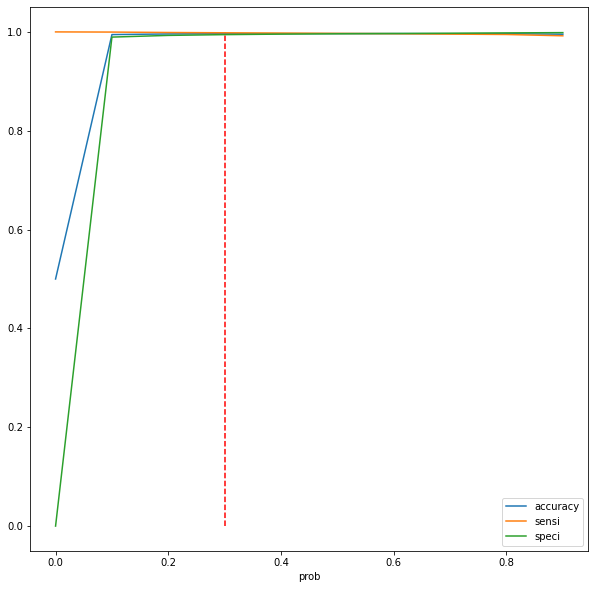

In [186]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(5,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [187]:
# deciding final cutoff point based on the bussiness requirement and prediction by the model
y_train_pred_svm_final['final_predicted'] = y_train_pred_svm_final.Fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1.555558e-06,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.000000e-07,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1.288852e-07,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,3.080306e-04,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1.000000e-07,4,0,1,0,0,0,0,0,0,0,0,0,0


In [188]:
#performance on the train data
evaluation_metric(y_train_pred_svm_final.Fraud,y_train_pred_svm_final.final_predicted,y_train_pred_svm_final.Fraud_Prob)

Recall/Sensitivity : 0.9997
confusion metrics :
 [[196935   2085]
 [    63 198957]]
Accuracy of model 
 0.9946035574314139
AUC Score : 0.9999


In [189]:
#confusion matrix results
metrics(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.final_predicted)

Sensitivity : 0.9997
Specificity : 0.9895
FPR : 0.01048
Positive predictive value : 0.9896
Negative predictive value : 0.9997


```On blanced data using SMOTE```

```AUC Score``` on the train data after deciding the cutoff: 99.99%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 99.97%

```Specificity``` on the train data after deciding the cutoff : 98.95%

```Accuracy``` on the train data after deciding the cutoff: 99.99%

### Predictions on the testset 

In [190]:
# predicts the fraud probability for train data
y_test_pred_svm_prob = svc_final_sm.predict_proba(X_test_svm_sm)[:,1]

y_test_pred_svm_final = pd.DataFrame({'Fraud':y_test_svm_sm.values, 'Fraud_Prob':y_test_pred_svm_prob})
y_test_pred_svm_final['CustID'] = y_test_svm_sm.index
y_test_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID
0,0,4.080849e-04,0
1,0,5.058677e-03,1
2,0,1.710881e-06,2
3,0,1.000000e-07,3
4,0,1.793099e-07,4


In [192]:
# earlier decided final cutoff point and predictions by the model on the test data
y_test_pred_svm_final['final_predicted'] = y_test_pred_svm_final.Fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,4.080849e-04,0,0
1,0,5.058677e-03,1,0
2,0,1.710881e-06,2,0
3,0,1.000000e-07,3,0
4,0,1.793099e-07,4,0


In [193]:
# performance of the model on the test data
evaluation_metric(y_test_pred_svm_final.Fraud, y_test_pred_svm_final.final_predicted, y_test_pred_svm_final.Fraud_Prob)

Recall/Sensitivity : 0.885
confusion metrics :
 [[84390   905]
 [ 9813 75482]]
Accuracy of model 
 0.9371709947828126
AUC Score : 0.9768


In [194]:
# confusion matrix for the test data
metrics(y_test_pred_svm_final.Fraud, y_test_pred_svm_final.final_predicted)

Sensitivity : 0.885
Specificity : 0.9894
FPR : 0.01061
Positive predictive value : 0.9882
Negative predictive value : 0.8958


```Train data values```

```AUC Score``` on the train data after deciding the cutoff: 99.99%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 99.97%

```Specificity``` on the train data after deciding the cutoff : 98.85%

```Accuracy``` on the train data after deciding the cutoff: 99.99%

```Test data values```

```AUC Score``` on the train data after deciding the cutoff: 97.68%

```Recall/Sensitivity``` on the test data after deciding the cutoff : 88.5%

```Specificity``` on the test data after deciding the cutoff : 98.94%

```Accuracy``` on the test data after deciding the cutoff: 93.71%


# Xgboost on Balanced data using SMOTE

In [195]:
#creating a copy

X_train_xg_sm = X_train_smote.copy() 
y_train_xg_sm = y_train_smote.copy()
X_test_xg_sm = X_test_smote.copy()
y_test_xg_sm = y_test_smote.copy()

print(X_train_xg_sm.shape)
print(y_train_xg_sm.shape)
print(X_test_xg_sm.shape)
print(y_test_xg_sm.shape)


(398040, 29)
(398040,)
(170590, 29)
(170590,)


In [197]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_xg_sm,y_train_xg_sm)

[18:57:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [198]:
#predicting the performance before hypertunning
predictions = xgb.predict(X_train_xg_sm)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [200]:
#performance on the train data
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_xg_sm, predictions))
print('confusion metrics :\n' , confusion_matrix(y_train_xg_sm, predictions))
print('Accuracy of model \n',accuracy_score(y_train_xg_sm, predictions))
print("AUC Score : %.4g" % roc_auc_score(y_train_xg_sm, xgb.predict_proba(X_train_xg_sm)[:,1]))


Recall/Sensitivity : 1
confusion metrics :
 [[199020      0]
 [     0 199020]]
Accuracy of model 
 1.0
AUC Score : 1


In [201]:
#classification report
print("Calssification Report:\n", classification_report(y_train_xg_sm,predictions))

Calssification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [202]:
# prediction on testset
y_test_pred = xgb.predict(X_test_xg_sm)
y_test_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [204]:
evaluation_metric(y_test_xg_sm, y_test_pred,xgb.predict_proba(X_test_xg_sm)[:,1])

Recall/Sensitivity : 0.8639
confusion metrics :
 [[85258    37]
 [11608 73687]]
Accuracy of model 
 0.9317369130664166
AUC Score : 0.9931


since by using the default parameter the model is overfitting hence lets tine the hyperparameters to get a good model

## Hyper parameter tuning

In [248]:
# hyperparameter tuning with XGBoost

# creating a StratifiedKFold object 
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv_xgb_sm = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_xgb_sm.fit(X_train_xg_sm, y_train_xg_sm)    

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[23:13:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  5.5min finished


[23:18:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
 

In [249]:
# cv results
cv_results_xgb_sm = pd.DataFrame(model_cv_xgb_sm.cv_results_)
cv_results_xgb_sm.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,8.423787,0.224366,0.127659,0.001410,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.996145,0.995978,0.996045,0.996056,0.000069,7,0.996219,0.996107,0.996078,0.996135,0.000061
1,12.032810,0.252690,0.138296,0.001244,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.996005,0.995749,0.996045,0.995933,0.000131,9,0.996094,0.995886,0.996072,0.996017,0.000093
2,14.594623,0.089599,0.136634,0.002821,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.996008,0.996136,0.995954,0.996033,0.000076,8,0.996107,0.996284,0.996004,0.996132,0.000116
3,8.916480,0.017396,0.145278,0.011697,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.998791,0.998545,0.998552,0.998629,0.000114,6,0.998762,0.998684,0.998602,0.998682,0.000065
4,12.251558,0.010752,0.139626,0.004534,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.998696,0.998769,0.998700,0.998722,0.000033,4,0.998696,0.998919,0.998742,0.998786,0.000096


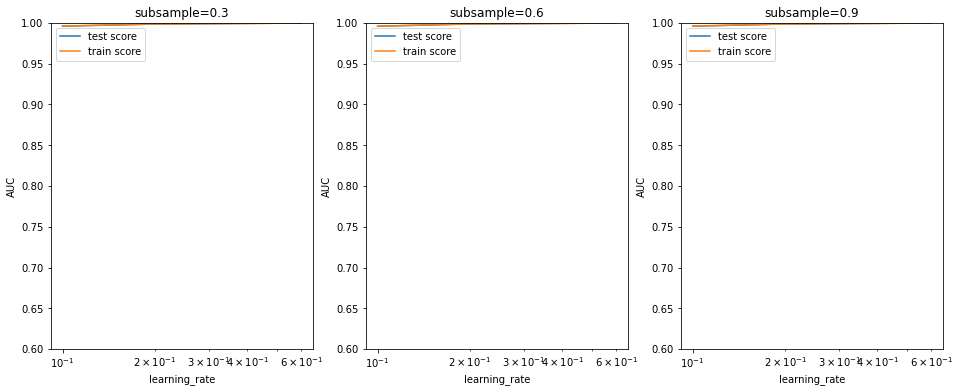

In [250]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results_xgb_sm[cv_results_xgb_sm['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [251]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv_xgb_sm.best_score_,'using',model_cv_xgb_sm.best_params_)

We can get accuracy of 0.9998194398709844 using {'learning_rate': 0.6, 'subsample': 0.6}


In [306]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':100,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_sm = XGBClassifier(params = params)
xgb_model_sm.fit(X_train_xg_sm, y_train_xg_sm)

[00:00:50] WARNING: ..\src\learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:00:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [307]:
# predictions  on the train data
predictions = xgb_model_sm.predict_proba(X_train_xg_sm)[:,1]

In [308]:
#predited array values
predictions

array([3.1537238e-06, 6.0638145e-06, 5.6109334e-06, ..., 9.9959844e-01,
       9.9999011e-01, 9.9920291e-01], dtype=float32)

In [309]:
#creating data frame and a column 
y_train_pred_xg_final = pd.DataFrame({'Fraud':y_train_xg_sm.values, 'Fraud_Prob':predictions})
y_train_pred_xg_final['CustID'] = y_train_xg_sm.index
y_train_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,3.153724e-06,0
1,0,6.063814e-06,1
2,0,5.610933e-06,2
3,0,1.101087e-05,3
4,0,3.743116e-07,4


In [310]:
y_train_pred_xg_final['predicted'] = y_train_pred_xg_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_xg_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,3.153724e-06,0,0
1,0,6.063814e-06,1,0
2,0,5.610933e-06,2,0
3,0,1.101087e-05,3,0
4,0,3.743116e-07,4,0


In [311]:
#calling the evalution metric code to see the performance on the train data after deciding a cutoff value
evaluation_metric(y_train_pred_xg_final.Fraud,y_train_pred_xg_final.predicted,y_train_pred_xg_final.Fraud_Prob)

Recall/Sensitivity : 1
confusion metrics :
 [[199020      0]
 [     0 199020]]
Accuracy of model 
 1.0
AUC Score : 1


In [312]:
metrics(y_train_pred_xg_final.Fraud,y_train_pred_xg_final.predicted)

Sensitivity : 1
Specificity : 1
FPR : 0
Positive predictive value : 1
Negative predictive value : 1


```Train data values``` 

```AUC Score``` on the train data : 100%

```Recall/Sensitivity``` on the train data  : 100%

```Specificity``` on the train data  : 100%

```Accuracy``` on the train data : 100%

## Ploting ROC Curve

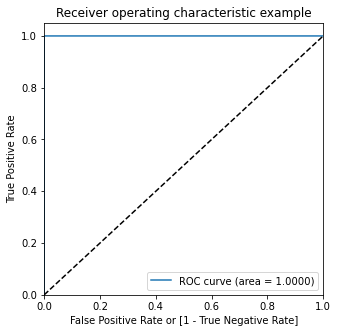

In [313]:
# calling the ROC curve
draw_roc(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.Fraud_Prob)

the area under the curve is high and ROC Area is 1.0 hence we can go with the model

### Finding optimal cutoff 

In [314]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_xg_final[i]= y_train_pred_xg_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,3.153724e-06,0,0,1,0,0,0,0,0,0,0,0,0
1,0,6.063814e-06,1,0,1,0,0,0,0,0,0,0,0,0
2,0,5.610933e-06,2,0,1,0,0,0,0,0,0,0,0,0
3,0,1.101087e-05,3,0,1,0,0,0,0,0,0,0,0,0
4,0,3.743116e-07,4,0,1,0,0,0,0,0,0,0,0,0


In [315]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_xg_final.Fraud, y_train_pred_xg_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensi     speci
0.0   0.0  0.500000    1.0  0.000000
0.1   0.1  0.999794    1.0  0.999588
0.2   0.2  0.999967    1.0  0.999935
0.3   0.3  0.999995    1.0  0.999990
0.4   0.4  1.000000    1.0  1.000000
0.5   0.5  1.000000    1.0  1.000000
0.6   0.6  1.000000    1.0  1.000000
0.7   0.7  1.000000    1.0  1.000000
0.8   0.8  1.000000    1.0  1.000000
0.9   0.9  1.000000    1.0  1.000000


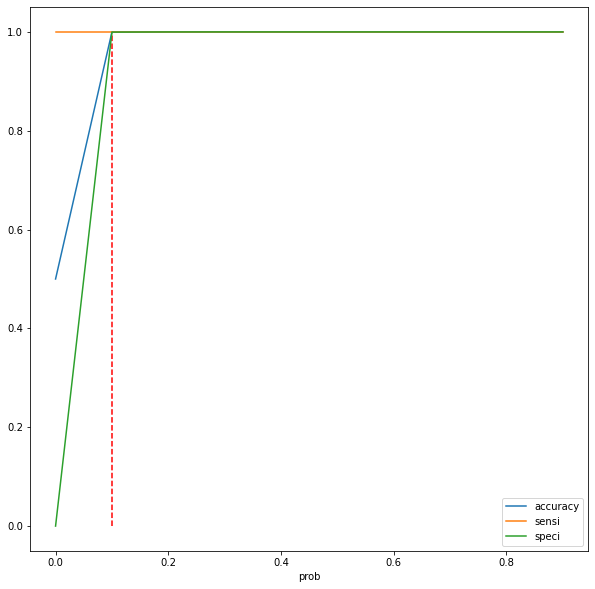

In [316]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.1, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

### From the curve above, 0.01 is the optimum point to take it as a cutoff probability.

In [317]:
# Final cutoff points and predictions by the model 
y_train_pred_xg_final['final_predicted'] = y_train_pred_xg_final.Fraud_Prob.map( lambda x: 1 if x > 0.01 else 0)

y_train_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,3.153724e-06,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,6.063814e-06,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,5.610933e-06,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1.101087e-05,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,3.743116e-07,4,0,1,0,0,0,0,0,0,0,0,0,0


In [318]:
# Let's check the overall accuracy on the train data after the cutoff value decided.
accuracy_score(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.final_predicted)

0.9966787257562054

In [319]:
#checking the performance
evaluation_metric(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.final_predicted ,y_train_pred_xg_final.Fraud_Prob)

Recall/Sensitivity : 1
confusion metrics :
 [[197698   1322]
 [     0 199020]]
Accuracy of model 
 0.9966787257562054
AUC Score : 1


In [320]:
# calling for confudion matrix
metrics(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.final_predicted)

Sensitivity : 1
Specificity : 0.9934
FPR : 0.006643
Positive predictive value : 0.9934
Negative predictive value : 1


```On training data```

```AUC Score``` on the train data after deciding the cutoff: 100%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 100%

```Specificity``` on the train data after deciding the cutoff : 99.34%

```Accuracy``` on the train data after deciding the cutoff: 99.66%

### Predictions on test data

In [321]:
# predicts the fraud probability for test data
y_test_pred_xg_prob =  xgb_model_sm.predict_proba(X_test_xg_sm)[:,1]

y_test_pred_xg_final = pd.DataFrame({'Fraud':y_test_xg_sm.values, 'Fraud_Prob':y_test_pred_xg_prob})
y_test_pred_xg_final['CustID'] = y_test_xg_sm.index
y_test_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,4.526019e-06,0
1,0,5.991146e-04,1
2,0,1.589180e-05,2
3,0,1.142428e-07,3
4,0,6.958611e-05,4


In [322]:
# FInal cutoff points and predictions by the model
y_test_pred_xg_final['final_predicted'] = y_test_pred_xg_final.Fraud_Prob.map( lambda x: 1 if x > 0.01 else 0)

y_test_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,4.526019e-06,0,0
1,0,5.991146e-04,1,0
2,0,1.589180e-05,2,0
3,0,1.142428e-07,3,0
4,0,6.958611e-05,4,0


In [323]:
#checking the performance on the test data
evaluation_metric(y_test_pred_xg_final.Fraud,y_test_pred_xg_final.final_predicted,y_test_pred_xg_final.Fraud_Prob)

Recall/Sensitivity : 0.9197
confusion metrics :
 [[84638   657]
 [ 6848 78447]]
Accuracy of model 
 0.9560056275279911
AUC Score : 0.9931


In [324]:
#checkingbthe performance mterics on the test data
metrics(y_test_pred_xg_final.Fraud, y_test_pred_xg_final.final_predicted)

Sensitivity : 0.9197
Specificity : 0.9923
FPR : 0.007703
Positive predictive value : 0.9917
Negative predictive value : 0.9251


```XGBoost Model summary```

- `Train set`

 - Accuracy = 99.66%
 - Sensitivity = 100%
 - Specificity = 99.34
 - ROC-AUC = 100%

- `Test set`
 - Accuracy = 95.6%
 - Sensitivity = 92%
 - Specificity = 99.23%
 - ROC-AUC = 99.31%

# Random Forest Using SMOTE Technique

In [188]:
# making  a copy

X_train_rf_sm = X_train_smote.copy() 
y_train_rf_sm = y_train_smote.copy()
X_test_rf_sm = X_test_smote.copy()
y_test_rf_sm = y_test_smote.copy()

print(X_train_rf_sm.shape)
print(y_train_rf_sm.shape)
print(X_test_rf_sm.shape)
print(y_test_rf_sm.shape)


(398040, 29)
(398040,)
(170590, 29)
(170590,)


In [331]:
rfc_sm = RandomForestClassifier()

In [333]:
rfc_sm.fit(X_train_rf_sm,y_train_rf_sm)

RandomForestClassifier()

In [335]:
#predicting the performance before hypertunning
predictions = rfc_sm.predict(X_train_rf_sm)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [337]:
#performance on the test data
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_rf_sm, predictions))
print('confusion metrics :\n' , confusion_matrix(y_train_rf_sm, predictions))
print('Accuracy of model \n',accuracy_score(y_train_rf_sm, predictions))
print("AUC Score : %.4g" % roc_auc_score(y_train_rf_sm, rfc_sm.predict_proba(X_train_rf_sm)[:,1]))


Recall/Sensitivity : 1
confusion metrics :
 [[199020      0]
 [     0 199020]]
Accuracy of model 
 1.0
AUC Score : 1


In [338]:
#classification report
print("Calssification Report:\n", classification_report(y_train_rf_sm,predictions))

Calssification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040



In [339]:
# prediction on testset
y_test_pred = rfc_sm.predict(X_test_rf_sm)
y_test_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [340]:
evaluation_metric(y_test_rf_sm, y_test_pred,rfc_sm.predict_proba(X_test_rf_sm)[:,1])

Recall/Sensitivity : 0.844
confusion metrics :
 [[85277    18]
 [13302 71993]]
Accuracy of model 
 0.9219180491236297
AUC Score : 0.9857


since by using the default parameter the model is overfitting hence lets tune the hyperparameters to get a good model

## Hyper parameter tuning

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [402]:
# specifying n_folds
n_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4) #5

#parameters to build model on
parameters = { "max_depth" : range(2,20,5)}

rf = RandomForestClassifier()

rf_sm = GridSearchCV(rf,parameters,
                     cv = n_folds,
                     scoring = "roc_auc",
                     n_jobs=-1,
                     verbose=3,
                     return_train_score = True)
rf_sm.fit(X_train_rf_sm,y_train_rf_sm)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:  1.2min remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  4.8min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  7.3min remaining:   48.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='roc_auc', verbose=3)

In [403]:
#results on tunning the model with max_depth
scores = rf_sm.cv_results_

In [404]:
#dataframe of results after tunning max_depth
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,64.345862,0.737579,0.660233,0.034612,2,{'max_depth': 2},0.965594,0.969219,0.967551,0.968844,...,0.967480,0.001421,4,0.966257,0.968755,0.967962,0.968344,0.966681,0.967600,9.659856e-04
1,192.729809,1.248726,0.930909,0.031705,7,{'max_depth': 7},0.996565,0.995988,0.996333,0.996009,...,0.996205,0.000218,3,0.996538,0.996194,0.996554,0.996161,0.996204,0.996330,1.767150e-04
2,275.681496,6.342336,1.011493,0.070033,12,{'max_depth': 12},0.999932,0.999863,0.999880,0.999916,...,0.999904,0.000028,2,0.999950,0.999952,0.999926,0.999943,0.999944,0.999943,9.340978e-06
3,264.482866,30.320635,0.831971,0.045582,17,{'max_depth': 17},0.999997,0.999975,0.999985,0.999998,...,0.999990,0.000009,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.739902e-08


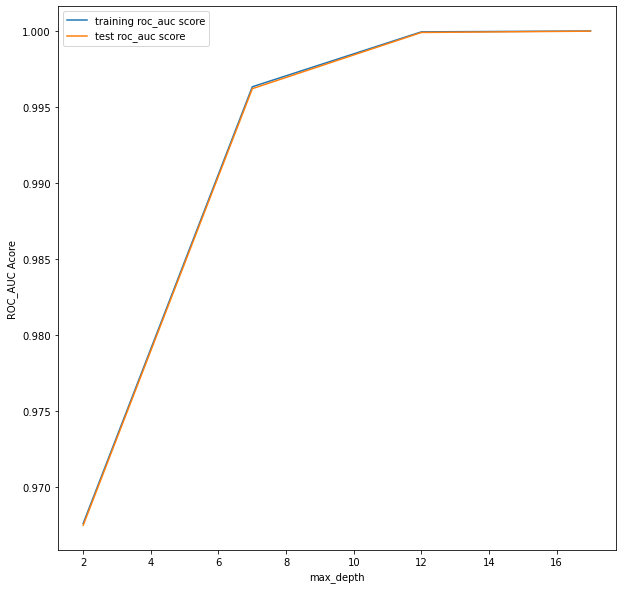

In [405]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("ROC_AUC Acore")
plt.legend()
plt.show()


we can see that best ```max_depth``` is between ```7 to 13```

# Tunning  n_estimators

In [398]:
# specifying n_folds
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

#parameters to build model on
parameters = { "n_estimators" : range(100,400,100)}

rf = RandomForestClassifier(max_depth = 8)

rf_sm = GridSearchCV(rf,parameters,
                 cv = n_folds,
                 scoring = "roc_auc",
                  n_jobs=-1,
                  verbose=3,
                 return_train_score = True)
rf_sm.fit(X_train_rf_sm,y_train_rf_sm)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  2.6min remaining:  9.1min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  4.7min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  6.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(max_depth=8), n_jobs=-1,
             param_grid={'n_estimators': range(100, 400, 100)},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [399]:
#scores of the model after tunning the model on the n_estimators  
scores = rf_sm.cv_results_

In [400]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,150.444081,0.372332,1.623666,0.009742,100,{'n_estimators': 100},0.997616,0.997432,0.997608,0.997552,0.000085,3,0.997647,0.997682,0.997753,0.997694,0.000044
1,273.766673,0.741063,2.609917,0.022339,200,{'n_estimators': 200},0.998020,0.997777,0.997573,0.997790,0.000183,2,0.998046,0.997979,0.997730,0.997918,0.000136
2,370.438578,1.860434,3.050503,0.084115,300,{'n_estimators': 300},0.997876,0.997912,0.997821,0.997870,0.000037,1,0.997909,0.998106,0.997958,0.997991,0.000084


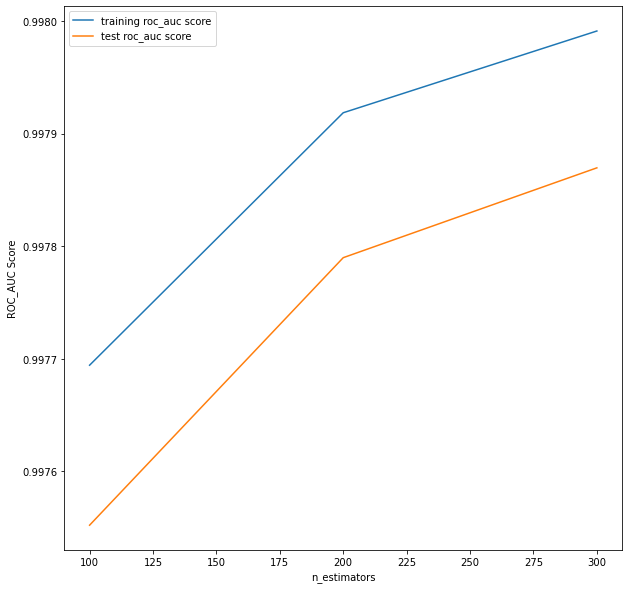

In [401]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("ROC_AUC Score")
plt.legend()
plt.show()


we can that best ```n_estimtor``` is between ```200 t0 300```

# Tunning min_sample_leaf 

In [406]:
#number of fold
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

#parameters the model build on
parameters = {"min_samples_leaf": range(50,300,50)}

rf = RandomForestClassifier()

rf_sm = GridSearchCV(rf,parameters,
                cv = n_folds,
                 scoring="roc_auc", 
                  n_jobs=-1,
                  verbose=3,
                 return_train_score = True)
rf_sm.fit(X_train_rf_sm,y_train_rf_sm)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  4.1min remaining: 11.2min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  4.3min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(50, 300, 50)},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [407]:
# scores of GridSearch CV
scores = rf_sm.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,251.191013,1.406033,1.793202,0.042810,50,{'min_samples_leaf': 50},0.999952,0.999941,0.999954,0.999949,0.000006,1,0.999966,0.999967,0.999965,0.999966,8.042156e-07
1,244.843326,3.223723,2.098719,0.221448,100,{'min_samples_leaf': 100},0.999903,0.999884,0.999895,0.999894,0.000008,2,0.999918,0.999920,0.999920,0.999919,8.250147e-07
2,236.542533,0.557814,2.280234,0.060337,150,{'min_samples_leaf': 150},0.999837,0.999822,0.999834,0.999831,0.000007,3,0.999858,0.999866,0.999862,0.999862,3.058824e-06
3,230.682211,1.718854,2.139946,0.027258,200,{'min_samples_leaf': 200},0.999755,0.999713,0.999755,0.999741,0.000020,4,0.999780,0.999781,0.999790,0.999784,4.420002e-06
4,125.559612,0.554453,1.255329,0.039854,250,{'min_samples_leaf': 250},0.999680,0.999632,0.999648,0.999653,0.000020,5,0.999701,0.999708,0.999691,0.999700,6.769326e-06


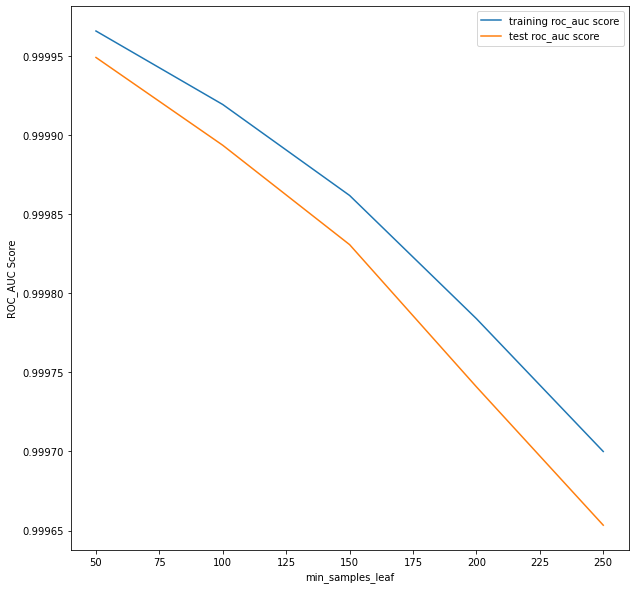

In [408]:
#plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("min_samples_leaf")
plt.ylabel("ROC_AUC Score")
plt.legend()
plt.show()

we can see  best ```min_samples_leaf``` are between 50 to 80 

# Max Feature Tuning

In [409]:
# GridSearchCV to find optimal max_features


# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=8)


# fit tree on training data
rf_sm = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="roc_auc",
                  n_jobs=-1,
                  verbose=3,
                  return_train_score=True)
rf_sm.fit(X_train_rf_sm, y_train_rf_sm)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:  4.5min remaining: 12.3min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed:  9.1min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 11.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(max_depth=8), n_jobs=-1,
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [410]:
# scores of GridSearch CV
scores = rf_sm.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,136.684674,0.183252,1.739679,0.016455,4,{'max_features': 4},0.997469,0.997858,0.997721,0.997683,0.000161,4,0.997490,0.998070,0.997871,0.997810,0.000241
1,261.879413,0.636329,1.648258,0.021855,8,{'max_features': 8},0.997701,0.997421,0.997489,0.997537,0.000119,5,0.997689,0.997650,0.997617,0.997652,0.000030
2,419.756397,1.416480,1.322463,0.037057,14,{'max_features': 14},0.998056,0.998295,0.997970,0.998107,0.000138,3,0.998083,0.998463,0.998101,0.998216,0.000175
3,539.681558,1.358209,1.072464,0.015965,20,{'max_features': 20},0.998411,0.998132,0.998319,0.998287,0.000116,1,0.998454,0.998336,0.998415,0.998401,0.000049
4,533.807304,0.569332,0.939820,0.017659,24,{'max_features': 24},0.998160,0.998254,0.998201,0.998205,0.000038,2,0.998211,0.998454,0.998318,0.998327,0.000099


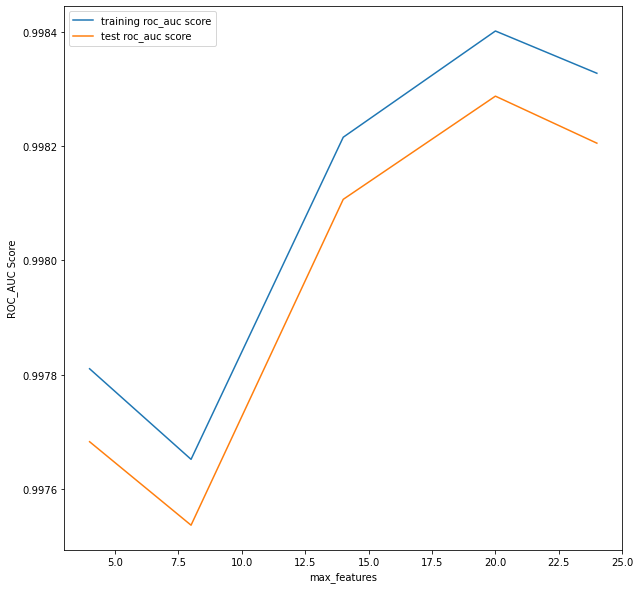

In [411]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_features")
plt.ylabel("ROC_AUC Score")
plt.legend()
plt.show()

we can see best ```max_features``` are between 13 to 18

# Grid Search To Find Optimal HyperParameters

In [413]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,8,12],
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,200, 300], 
    'max_features': [9,12,15,18]
}
# Create a based model
c = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_sm = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = c, n_jobs = -1,verbose = 3)
grid_search_sm.fit(X_train_rf_sm,y_train_rf_sm)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 71.5min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 228.5min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 453.5min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 836.9min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 1198.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 12],
                         'max_features': [9, 12, 15, 18],
                         'min_samples_leaf': range(50, 200, 50),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [414]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_sm.best_score_,'using',grid_search_sm.best_params_)

We can get accuracy of 0.9936513918199176 using {'max_depth': 12, 'max_features': 18, 'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 100}


we get a accuracy of 99.99% using following parameter values:

- `max_depth` : 12
- `max_features` : 18
- `min_samples_leaf` : 50
- `min_samples_split` : 200
- `n_estimators` : 100

In [416]:
#number of folds
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

#rf = RandomForestClassifier()

#final RandomForestClasssifier model with all parameters
final_rfc_sm = RandomForestClassifier(bootstrap=True,
                                      max_depth=12,
                                      min_samples_leaf=50, 
                                      min_samples_split=400,
                                      max_features=13,
                                      n_estimators=200,
                                      n_jobs = -1,
                                      verbose = 3 ,
                                      class_weight="balanced",
                                      random_state=100)
#fittingbthe model on the final model built 
final_rfc_sm.fit(X_train_rf_sm,y_train_rf_sm)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200

[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.7s



building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 6

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.7min


building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.2min finished


RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=13,
                       min_samples_leaf=50, min_samples_split=400,
                       n_estimators=200, n_jobs=-1, random_state=100,
                       verbose=3)

In [417]:
# predictions  on the train data
predictions = final_rfc_sm.predict_proba(X_train_rf_sm)[:,1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.3s finished


In [418]:
#predited array values
predictions

array([0.02451466, 0.00434795, 0.00613954, ..., 0.96519872, 0.99984883,
       0.96019938])

In [419]:
#creating data frame and a column 
y_train_pred_rf_final = pd.DataFrame({'Fraud':y_train_rf_sm.values, 'Fraud_Prob':predictions})
y_train_pred_rf_final['CustID'] = y_train_rf_sm.index
y_train_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.024515,0
1,0,0.004348,1
2,0,0.006140,2
3,0,0.025751,3
4,0,0.008006,4


In [420]:
y_train_pred_rf_final['predicted'] = y_train_pred_rf_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_rf_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,0.024515,0,0
1,0,0.004348,1,0
2,0,0.006140,2,0
3,0,0.025751,3,0
4,0,0.008006,4,0


In [421]:
#calling the evalution metric code to see the performance on the train data after deciding a cutoff value
evaluation_metric(y_train_pred_rf_final.Fraud,y_train_pred_rf_final.predicted,y_train_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 0.9873
confusion metrics :
 [[198674    346]
 [  2531 196489]]
Accuracy of model 
 0.9927720832077178
AUC Score : 0.9998


In [426]:
metrics(y_train_pred_rf_final.Fraud,y_train_pred_rf_final.predicted)

Sensitivity : 0.9873
Specificity : 0.9983
FPR : 0.001739
Positive predictive value : 0.9982
Negative predictive value : 0.9874


In [ ]:
# calling the ROC curve
draw_roc(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.Fraud_Prob)

```On blanced dataset using smote```

```AUC Score``` on the train data : 99.98%

```Recall/Sensitivity``` on the train data : 98.73%

```Specificity``` on the train data : 99.83%

```Accuracy``` on the train data : 99.27%

### Finding optimal cutoff

In [429]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_rf_final[i]= y_train_pred_rf_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.024515,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0.004348,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.006140,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.025751,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.008006,4,0,1,0,0,0,0,0,0,0,0,0


In [430]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_rf_final.Fraud, y_train_pred_rf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.963295  0.999839  0.926751
0.2   0.2  0.988926  0.998854  0.978997
0.3   0.3  0.993955  0.996242  0.991669
0.4   0.4  0.994418  0.992342  0.996493
0.5   0.5  0.992772  0.987283  0.998261
0.6   0.6  0.989318  0.979565  0.999070
0.7   0.7  0.983924  0.968450  0.999397
0.8   0.8  0.973440  0.947231  0.999648
0.9   0.9  0.954464  0.909155  0.999774


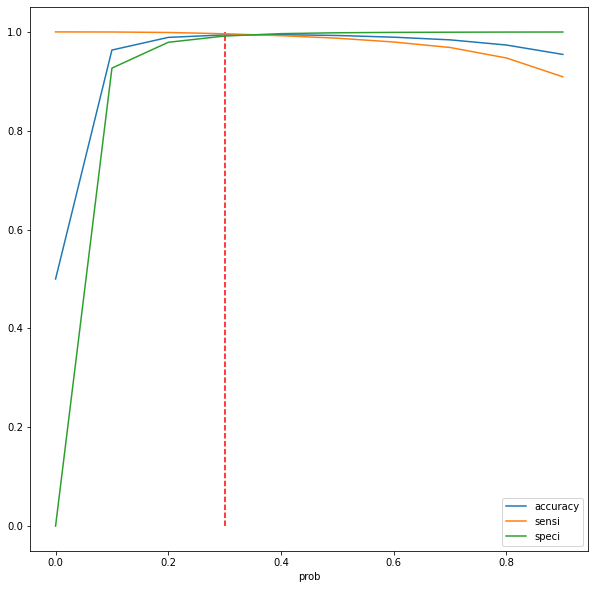

In [477]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [517]:
# Final cutoff points and predictions by the model 
y_train_pred_rf_final['final_predicted'] = y_train_pred_rf_final.Fraud_Prob.map( lambda x: 1 if x > 0.12 else 0)

y_train_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.024515,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.004348,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.006140,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.025751,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.008006,4,0,1,0,0,0,0,0,0,0,0,0,0


In [518]:
# Let's check the overall accuracy on the train data after the cutoff value decided.
accuracy_score(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.final_predicted)

0.9722188724751282

In [519]:
#checking the performance
evaluation_metric(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.final_predicted ,y_train_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 0.9998
confusion metrics :
 [[187997  11023]
 [    35 198985]]
Accuracy of model 
 0.9722188724751282
AUC Score : 0.9998


In [520]:
# calling for confudion matrix
metrics(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.final_predicted)

Sensitivity : 0.9998
Specificity : 0.9446
FPR : 0.05539
Positive predictive value : 0.9475
Negative predictive value : 0.9998


```On blanced dataset using smote```

```AUC Score``` on the train data : 99.98%

```Recall/Sensitivity``` on the train data : 99.98%

```Specificity``` on the train data : 94.46%

```Accuracy``` on the train data : 97.22%

## Precdiction on test data 

In [521]:
# predicts the fraud probability for test data
y_test_pred_rf_prob =  final_rfc_sm.predict_proba(X_test_rf_sm)[:,1]

y_test_pred_rf_final = pd.DataFrame({'Fraud':y_test_rf_sm.values, 'Fraud_Prob':y_test_pred_rf_prob})
y_test_pred_rf_final['CustID'] = y_test_rf_sm.index
y_test_pred_rf_final.head()

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.5s finished


,Fraud,Fraud_Prob,CustID
0,0,0.031224,0
1,0,0.055963,1
2,0,0.005276,2
3,0,0.002103,3
4,0,0.077655,4


In [522]:
# FInal cutoff points and predictions by the model
y_test_pred_rf_final['final_predicted'] = y_test_pred_rf_final.Fraud_Prob.map( lambda x: 1 if x > 0.12 else 0)

y_test_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,0.031224,0,0
1,0,0.055963,1,0
2,0,0.005276,2,0
3,0,0.002103,3,0
4,0,0.077655,4,0


In [523]:
#checking the performance on the test data
evaluation_metric(y_test_pred_rf_final.Fraud,y_test_pred_rf_final.final_predicted,y_test_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 0.9453
confusion metrics :
 [[80426  4869]
 [ 4669 80626]]
Accuracy of model 
 0.9440881646051937
AUC Score : 0.9906


In [524]:
#checkingbthe performance mterics on the test data
metrics(y_test_pred_rf_final.Fraud, y_test_pred_rf_final.final_predicted)

Sensitivity : 0.9453
Specificity : 0.9429
FPR : 0.05708
Positive predictive value : 0.943
Negative predictive value : 0.9451


```On blanced dataset using smote```

```AUC Score``` on the test data : 99.06%

```Recall/Sensitivity``` on the test data : 94.53%

```Specificity``` on the test data : 94.29%

```Accuracy``` on the test data : 94.40%

## Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [189]:
#number of folds
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

#rf = RandomForestClassifier()

#final RandomForestClasssifier model with all parameters
clf = RandomForestClassifier(bootstrap=True,
                                      max_depth=12,
                                      min_samples_leaf=50, 
                                      min_samples_split=400,
                                      max_features=13,
                                      n_estimators=200,
                                      n_jobs = -1,
                                      verbose = 3 ,
                                      class_weight="balanced",
                                      random_state=100)
#fittingbthe model on the final model built 
clf.fit(X_train_rf_sm,y_train_rf_sm)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.9s


building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  1.8min



building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.3min finished


RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=13,
                       min_samples_leaf=50, min_samples_split=400,
                       n_estimators=200, n_jobs=-1, random_state=100,
                       verbose=3)

In [190]:
# predicts the fraud probability for test data
y_test_pred_rf_prob =  clf.predict_proba(X_test_rf_sm)[:,1]

y_test_pred_rf_final = pd.DataFrame({'Fraud':y_test_rf_sm.values, 'Fraud_Prob':y_test_pred_rf_prob})
y_test_pred_rf_final['CustID'] = y_test_rf_sm.index
y_test_pred_rf_final.head()

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.5s finished


,Fraud,Fraud_Prob,CustID
0,0,0.031224,0
1,0,0.055963,1
2,0,0.005276,2
3,0,0.002103,3
4,0,0.077655,4


In [191]:
# FInal cutoff points and predictions by the model
y_test_pred_rf_final['final_predicted'] = y_test_pred_rf_final.Fraud_Prob.map( lambda x: 1 if x > 0.12 else 0)

y_test_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,0.031224,0,0
1,0,0.055963,1,0
2,0,0.005276,2,0
3,0,0.002103,3,0
4,0,0.077655,4,0


In [192]:
#checking the performance on the test data
evaluation_metric(y_test_pred_rf_final.Fraud,y_test_pred_rf_final.final_predicted,y_test_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 0.9453
confusion metrics :
 [[80426  4869]
 [ 4669 80626]]
Accuracy of model 
 0.9440881646051937
AUC Score : 0.9906


In [193]:
#checkingbthe performance mterics on the test data
metrics(y_test_pred_rf_final.Fraud, y_test_pred_rf_final.final_predicted)

Sensitivity : 0.9453
Specificity : 0.9429
FPR : 0.05708
Positive predictive value : 0.943
Negative predictive value : 0.9451


```On blanced dataset using smote best model reults for test data```

```AUC Score``` on the test data : 99.06%

```Recall/Sensitivity``` on the test data : 94.53%

```Specificity``` on the test data : 94.29%

```Accuracy``` on the test data : 94.40%

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 10
3rd Top var = 12


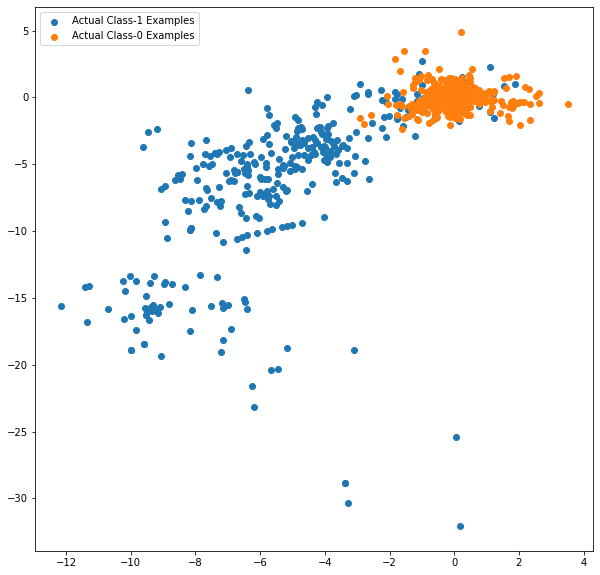

In [201]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Print the class distribution after applying ADASYN

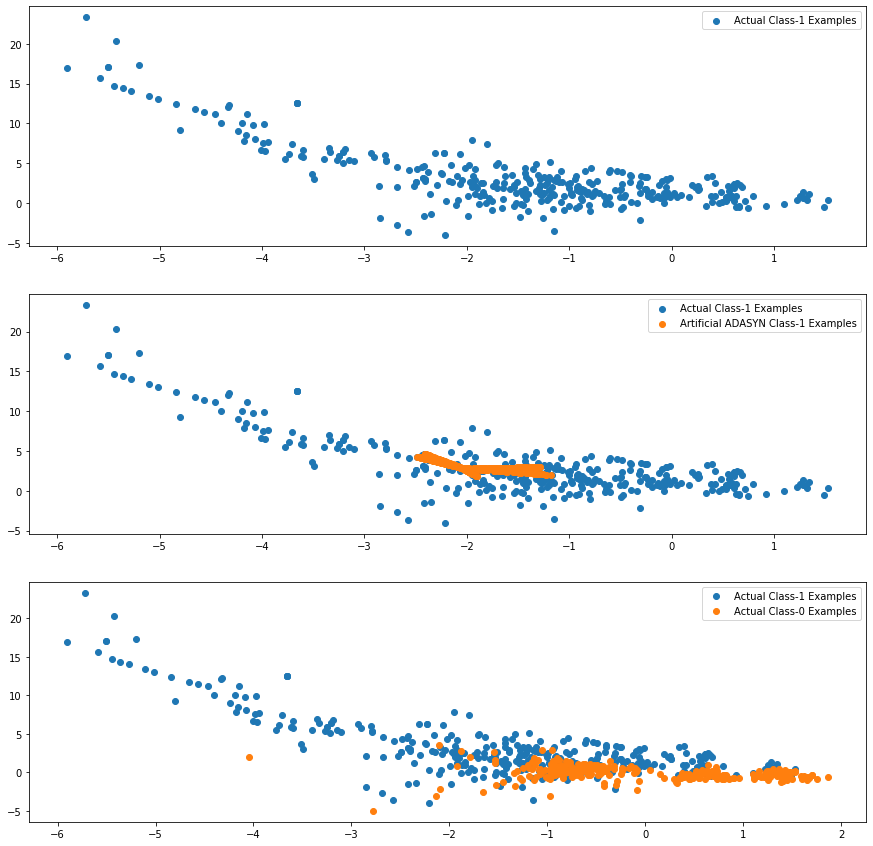

In [202]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [203]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_adasyn.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_adasyn.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_adasyn==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_adasyn==0)))

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 199020 

After OverSampling, the shape of train_X: (398059, 29)
After OverSampling, the shape of train_y: (398059,) 

After OverSampling, counts of label '1': 199039
After OverSampling, counts of label '0': 199020


In [204]:
#balancing the test data using adasyn

X_test_adasyn, y_test_adasyn = ada.fit_resample(X_test, y_test)

In [205]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_test_adasyn.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_test_adasyn.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_test_adasyn==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_test_adasyn==0)))

Before OverSampling, counts of label '1': 148
Before OverSampling, counts of label '0': 85295 

After OverSampling, the shape of train_X: (170605, 29)
After OverSampling, the shape of train_y: (170605,) 

After OverSampling, counts of label '1': 85310
After OverSampling, counts of label '0': 85295


# Logistic RegressionCV Using ADASYN Technique

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV #import the package
X_train_logreg_adasyn = X_train_adasyn.copy() 
y_train_logreg_adasyn = y_train_adasyn.copy()
X_test_logreg_adasyn = X_test_adasyn.copy()
y_test_logreg_adasyn = y_test_adasyn.copy()

print(X_train_logreg_adasyn.shape)
print(y_train_logreg_adasyn.shape)
print(X_test_logreg_adasyn.shape)
print(y_test_logreg_adasyn.shape)


(398059, 29)
(398059,)
(170605, 29)
(170605,)


In [38]:
#logistic regression using gridsearchcv

num_C = [0.01, 0.1, 1, 10, 100, 1000]#--> list of values

cv_num = StratifiedKFold(n_splits=3, shuffle=True, random_state=4) #5 #--> list of values

param_grid = dict(Cs=num_C)

logreg_model = LogisticRegressionCV(penalty='l2',random_state=7)


logreg_model_adasyn = GridSearchCV(estimator=logreg_model, 
                                 param_grid=param_grid,
                                 scoring= 'roc_auc',
                                 cv = cv_num,
                                 verbose = 1,
                                 n_jobs=-1,
                                 return_train_score=True)
#fitting the model 
logreg_model_adasyn.fit(X_train_logreg_adasyn,y_train_logreg_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  18 | elapsed:  3.8min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 16.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegressionCV(random_state=7), n_jobs=-1,
             param_grid={'Cs': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [39]:
#results on tunning the model
scores = logreg_model_adasyn.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Cs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.514175,0.022296,0.000000,0.000000,0.01,{'Cs': 0.01},NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN
1,0.590031,0.057972,0.000000,0.000000,0.1,{'Cs': 0.1},NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN
2,10.706130,0.227405,0.139094,0.002253,1,{'Cs': 1},0.950483,0.950495,0.949312,0.950097,0.000555,4,0.950073,0.950041,0.950244,0.950119,0.000089
3,49.734886,0.350760,0.116593,0.001208,10,{'Cs': 10},0.958661,0.958763,0.957934,0.958453,0.000369,1,0.958468,0.958478,0.958480,0.958475,0.000005
4,223.184013,1.936952,0.077667,0.005544,100,{'Cs': 100},0.958660,0.958764,0.957933,0.958453,0.000370,3,0.958468,0.958479,0.958479,0.958475,0.000005


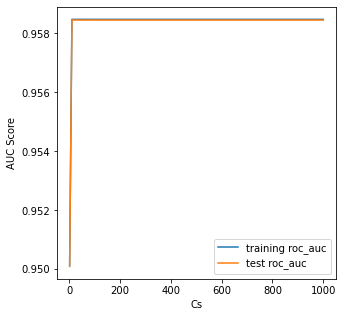

In [40]:
# plotting accuracies with Cs
plt.figure(figsize=(5, 5))
plt.plot(scores["param_Cs"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_Cs"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("Cs")
plt.ylabel("AUC Score")
plt.legend()
plt.show()


In [41]:
# Best score with best C
best_score = logreg_model_adasyn.best_score_
best_C = logreg_model_adasyn.best_params_['Cs']

print(" The highest test roc_auc is {0} at Cs = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9584528726246954 at Cs = 10


## Logistic regression with optimal C  

In [42]:
# Instantiate the model with best Cs
logreg_adasyn = LogisticRegressionCV(Cs=10,penalty='l2',random_state=7)

In [43]:
# fitting the model
logreg_adasyn.fit(X_train_logreg_adasyn,y_train_logreg_adasyn)

LogisticRegressionCV(random_state=7)

In [44]:
# predicts the fraud probability for train data
y_train_pred_logreg_prob = logreg_adasyn.predict_proba(X_train_logreg_adasyn)[:,1]

y_train_pred_logreg_final = pd.DataFrame({'Fraud':y_train_logreg_adasyn.values, 'Fraud_Prob':y_train_pred_logreg_prob})
y_train_pred_logreg_final['CustID'] = y_train_logreg_adasyn.index

y_train_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.209351,0
1,0,0.009766,1
2,0,0.349923,2
3,0,0.024161,3
4,0,0.210876,4


In [45]:
# predicting Fraud for train data
# Creating new column 'predicted' with 1 if fraud_Prob > 0.5 else 0
y_train_pred_logreg_final['predicted'] = y_train_pred_logreg_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_logreg_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,0.209351,0,0
1,0,0.009766,1,0
2,0,0.349923,2,0
3,0,0.024161,3,0
4,0,0.210876,4,0


In [46]:
#calling evalutaion metric funtion created earlier to see the performance
evaluation_metric(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.predicted, y_train_pred_logreg_final.Fraud_Prob)

Recall/Sensitivity : 0.8373
confusion metrics :
 [[181629  17391]
 [ 32376 166663]]
Accuracy of model 
 0.8749758201673621
AUC Score : 0.9585


In [47]:
#performance on the train data
metrics(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.predicted)

Sensitivity : 0.8373
Specificity : 0.9126
FPR : 0.08738
Positive predictive value : 0.9055
Negative predictive value : 0.8487


## Ploting auc roc curve

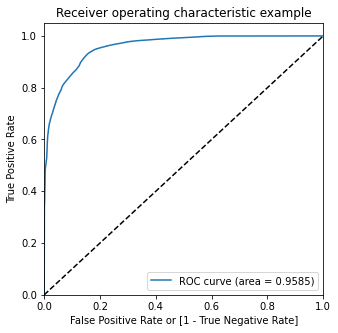

In [48]:
draw_roc(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.Fraud_Prob)

```On blanced dataset using ADASYN```

```AUC Score``` on the train data : 95.85%

```Recall/Sensitivity``` on the train data : 83.73%

```Specificity``` on the train data : 91.26%

```Accuracy``` on the train data : 87.49%

### Finding optimal cutoff

In [49]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_logreg_final[i]= y_train_pred_logreg_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.209351,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.009766,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.349923,2,0,1,1,1,1,0,0,0,0,0,0
3,0,0.024161,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.210876,4,0,1,1,1,0,0,0,0,0,0,0


In [50]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500024  1.000000  0.000000
0.1   0.1  0.765326  0.991208  0.539423
0.2   0.2  0.844727  0.974101  0.715340
0.3   0.3  0.882020  0.949035  0.814998
0.4   0.4  0.879397  0.881707  0.877088
0.5   0.5  0.874976  0.837338  0.912617
0.6   0.6  0.867088  0.795970  0.938212
0.7   0.7  0.854861  0.754536  0.955195
0.8   0.8  0.838657  0.708600  0.968727
0.9   0.9  0.814465  0.645215  0.983730


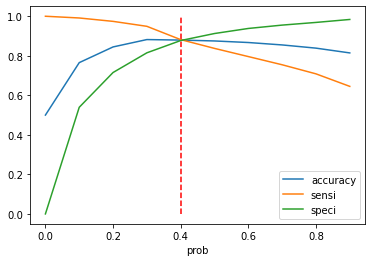

In [51]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
#plt.figure(figsize=(5,5))
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],ax=ax)
plt.vlines(x=0.4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

 From the curve above, 0.4 is the optimum point, since we are interested mostly on specificity/Recall hence taking cutoff as 0.35

In [52]:
# Final cutoff points and predictions by the model
# decreasing the final cuttoff value to increase specificity/recall as per business requirement
y_train_pred_logreg_final['final_predicted'] = y_train_pred_logreg_final.Fraud_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.209351,0,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.009766,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.349923,2,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.024161,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.210876,4,0,1,1,1,0,0,0,0,0,0,0,0


In [53]:
# Let's check the overall accuracy on the train dat after deciding the cutoff.
evaluation_metric(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.final_predicted, y_train_pred_logreg_final.Fraud_Prob)

Recall/Sensitivity : 0.9249
confusion metrics :
 [[169035  29985]
 [ 14947 184092]]
Accuracy of model 
 0.8871222607703884
AUC Score : 0.9585


In [54]:
#calling evalutaion metric funtion created earlier to see the performance
metrics(y_train_pred_logreg_final.Fraud, y_train_pred_logreg_final.final_predicted)

Sensitivity : 0.9249
Specificity : 0.8493
FPR : 0.1507
Positive predictive value : 0.8599
Negative predictive value : 0.9188


```On blanced data using ADASYN```

```AUC Score``` on the train data after deciding the cutoff: 95.85%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 92.49%

```Specificity``` on the train data after deciding the cutoff : 84.93%

```Accuracy``` on the train data after deciding the cutoff: 88.71%

## Predictions on Test Data

In [55]:
# predicts the fraud probability for test data
y_test_pred_logreg_prob = logreg_adasyn.predict_proba(X_test_logreg_adasyn)[:,1]

y_test_pred_logreg_final = pd.DataFrame({'Fraud':y_test_logreg_adasyn.values, 'Fraud_Prob':y_test_pred_logreg_prob})
y_test_pred_logreg_final['CustID'] = y_test_logreg_adasyn.index
y_test_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.135372,0
1,0,0.250576,1
2,0,0.365890,2
3,0,0.081421,3
4,0,0.071703,4


In [56]:
# putiing final cutoff points and making predictions by the model on the data
y_test_pred_logreg_final['final_predicted'] = y_test_pred_logreg_final.Fraud_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_test_pred_logreg_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,0.135372,0,0
1,0,0.250576,1,0
2,0,0.365890,2,1
3,0,0.081421,3,0
4,0,0.071703,4,0


In [57]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
evaluation_metric(y_test_pred_logreg_final.Fraud, y_test_pred_logreg_final.final_predicted,y_test_pred_logreg_final.Fraud_Prob )

Recall/Sensitivity : 0.9444
confusion metrics :
 [[72506 12789]
 [ 4744 80566]]
Accuracy of model 
 0.8972304445942382
AUC Score : 0.9511


In [58]:
#calling evalutaion metric funtion created earlier to see the performance
metrics(y_test_pred_logreg_final.Fraud, y_test_pred_logreg_final.final_predicted)

Sensitivity : 0.9444
Specificity : 0.8501
FPR : 0.1499
Positive predictive value : 0.863
Negative predictive value : 0.9386


```On blanced data using ADASYN```

```AUC Score``` on the train data after deciding the cutoff: 95.85%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 92.49%

```Specificity``` on the train data after deciding the cutoff : 84.93%

```Accuracy``` on the train data after deciding the cutoff: 88.71%


```AUC Score``` on the test data after deciding the cutoff: 98.48%

```Recall/Sensitivity``` on the test data after deciding the cutoff : 98.26%

```Specificity``` on the test data after deciding the cutoff : 85.01%

```Accuracy``` on the test data after deciding the cutoff: 91.63%

# SVM using ADASYN Technique

In [143]:
X_train_svm_adasyn = X_train_adasyn.copy() 
y_train_svm_adasyn = y_train_adasyn.copy()
X_test_svm_adasyn = X_test_adasyn.copy()
y_test_svm_adasyn = y_test_adasyn.copy()

print(X_train_svm_adasyn.shape)
print(y_train_svm_adasyn.shape)
print(X_test_svm_adasyn.shape)
print(y_test_svm_adasyn.shape)


(398059, 29)
(398059,)
(170605, 29)
(170605,)


In [689]:
# creating svc object
svc = SVC()

# fitting model on svc
svc.fit(X_train_svm_adasyn,y_train_svm_adasyn)

SVC()

In [690]:
# predicting the values of y_train
y_train_pred_svc_adasyn = svc.predict(X_train_svm_adasyn)
y_train_pred_svc_adasyn

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [691]:
#checking the performance the following metrics on train
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_svm_adasyn, y_train_pred_svc_adasyn))
print('confusion metrics :\n' , confusion_matrix(y_train_svm_adasyn, y_train_pred_svc_adasyn))
print('Accuracy of model \n',accuracy_score(y_train_svm_adasyn, y_train_pred_svc_adasyn))


Recall/Sensitivity : 0.9999
confusion metrics :
 [[197096   1924]
 [    23 199016]]
Accuracy of model 
 0.9951087652835384


In [692]:
# predicting the values of y_test
y_test_pred_svc_adasyn = svc.predict(X_test_svm_adasyn)
y_test_pred_svc_adasyn

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [693]:
#checking the performance the following metrics on test
print ("Recall/Sensitivity : %.4g" % recall_score(y_test_svm_adasyn, y_test_pred_svc_adasyn))
print('confusion metrics :\n' , confusion_matrix(y_test_svm_adasyn, y_test_pred_svc_adasyn))
print('Accuracy of model \n',accuracy_score(y_test_svm_adasyn, y_test_pred_svc_adasyn))

Recall/Sensitivity : 0.7985
confusion metrics :
 [[84482   813]
 [17184 68111]]
Accuracy of model 
 0.8945014361920394


Model is overfitting, lets try with hyper parameters tunning

In [694]:
# paraneter tuning with non linear kernal
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

cv_ = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

svm1 = SVC(probability=True)

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', 
                        cv = cv_, 
                        verbose = 3,
                        n_jobs=-1,
                       return_train_score=True) 
model_cv.fit(X_train_svm_adasyn, y_train_svm_adasyn)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 52.9min remaining: 145.5min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 101.7min remaining: 50.9min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 199.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='f1', verbose=3)

In [695]:
#score of the modle
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10889.326442,432.685283,222.440937,3.258075,0.1,{'C': 0.1},0.974927,0.974294,0.974580,0.974600,0.000259,5,0.974823,0.975078,0.974201,0.974701,0.000368
1,5834.608064,55.090120,106.400025,0.842128,1,{'C': 1},0.993351,0.993433,0.993820,0.993535,0.000205,4,0.993619,0.993753,0.993575,0.993649,0.000076
2,3153.062079,139.745888,39.290889,2.634680,10,{'C': 10},0.998315,0.998217,0.998457,0.998330,0.000099,3,0.998563,0.998525,0.998503,0.998530,0.000025
3,2137.077212,46.437196,12.423432,0.333732,100,{'C': 100},0.999284,0.999239,0.999458,0.999327,0.000094,2,0.999586,0.999578,0.999552,0.999572,0.000015
4,1540.245703,12.594461,4.801489,0.310946,1000,{'C': 1000},0.999601,0.999548,0.999638,0.999596,0.000037,1,0.999883,0.999895,0.999883,0.999887,0.000005


<Figure size 1080x1080 with 0 Axes>

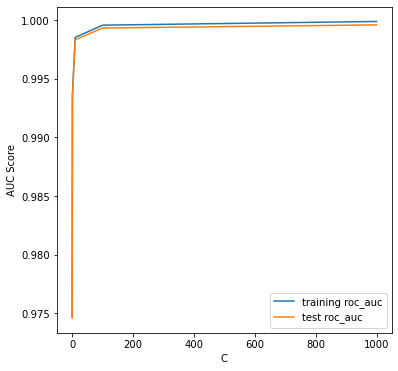

In [698]:
# plotting accuracies with C
plt.figure()
fig_dims = (6, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training roc_auc")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test roc_auc")
plt.xlabel("C")
plt.ylabel("AUC Score")
plt.legend()
plt.show()

In [699]:
# best params 
model_cv.best_params_

{'C': 1000}

In [144]:
# fitting the final model
svc_final_adasyn = SVC(C=10,kernel='rbf',probability=True)
svc_final_adasyn.fit(X_train_svm_adasyn,y_train_svm_adasyn)

SVC(C=10, probability=True)

In [145]:
# predicting the values of y_train
y_train_pred_svc_final_prob = svc_final_adasyn.predict_proba(X_train_svm_adasyn)[:,1]
y_train_pred_svc_final_prob

array([1.00000010e-07, 1.00000010e-07, 1.00000010e-07, ...,
       9.99984741e-01, 9.93365345e-01, 9.99999374e-01])

In [146]:
print("AUC Score : %.4g" %roc_auc_score(y_train_svm_adasyn, y_train_pred_svc_final_prob))

AUC Score : 0.9999


In [147]:
# predicts the fraud probability for train data
#y_train_pred_logreg_prob = logreg_model.predict_proba(X_train_pca_logreg)[:,1]

y_train_pred_svm_final = pd.DataFrame({'Fraud':y_train_svm_adasyn.values, 'Fraud_Prob':y_train_pred_svc_final_prob})
y_train_pred_svm_final['CustID'] = y_train_svm_adasyn.index
y_train_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID
0,0,1.000000e-07,0
1,0,1.000000e-07,1
2,0,1.000000e-07,2
3,0,1.000000e-07,3
4,0,1.000000e-07,4


In [148]:
# predicting fraud for train data
# Creating new column 'predicted' with 1 if fraud_Prob > 0.5 else 0
y_train_pred_svm_final['predicted'] = y_train_pred_svm_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_svm_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,1.000000e-07,0,0
1,0,1.000000e-07,1,0
2,0,1.000000e-07,2,0
3,0,1.000000e-07,3,0
4,0,1.000000e-07,4,0


In [149]:
# cllaing the evalution metrics to check the performance on the train data
evaluation_metric(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.predicted, y_train_pred_svm_final.Fraud_Prob)

Recall/Sensitivity : 1
confusion metrics :
 [[198816    204]
 [     0 199039]]
Accuracy of model 
 0.9994875131575972
AUC Score : 0.9999


In [150]:
#confusion matrix
metrics(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.predicted)

Sensitivity : 1
Specificity : 0.999
FPR : 0.001025
Positive predictive value : 0.999
Negative predictive value : 1


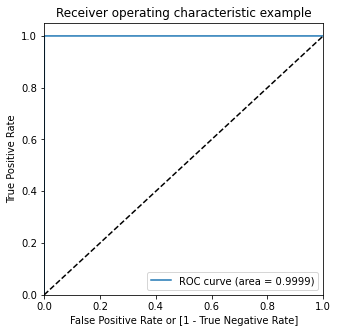

In [151]:
#roc curve
draw_roc(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.Fraud_Prob)

```On balanced dataset using ADADYN```

```AUC Score``` on the train data : 99.99

```Recall/Sensitivity``` on the train data : 100%

```Specificity``` on the train data : 99.9%

```Accuracy``` on the train data : 99.94%

### Finding optimal cutoff 

In [152]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_svm_final[i]= y_train_pred_svm_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.000000e-07,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1.000000e-07,1,0,1,0,0,0,0,0,0,0,0,0
2,0,1.000000e-07,2,0,1,0,0,0,0,0,0,0,0,0
3,0,1.000000e-07,3,0,1,0,0,0,0,0,0,0,0,0
4,0,1.000000e-07,4,0,1,0,0,0,0,0,0,0,0,0


In [153]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_svm_final.Fraud, y_train_pred_svm_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500024  1.000000  0.000000
0.1   0.1  0.999168  1.000000  0.998337
0.2   0.2  0.999299  1.000000  0.998598
0.3   0.3  0.999382  1.000000  0.998764
0.4   0.4  0.999437  1.000000  0.998874
0.5   0.5  0.999488  1.000000  0.998975
0.6   0.6  0.999513  1.000000  0.999025
0.7   0.7  0.999553  0.999995  0.999111
0.8   0.8  0.999623  0.999990  0.999256
0.9   0.9  0.999694  0.999990  0.999397


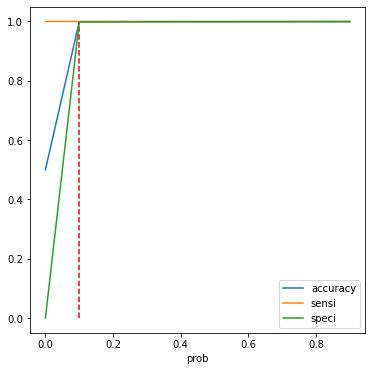

In [155]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],ax =ax)
plt.vlines(x=0.1, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [178]:
# deciding final cutoff point based on the bussiness requirement and prediction by the model
y_train_pred_svm_final['final_predicted'] = y_train_pred_svm_final.Fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1.000000e-07,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.000000e-07,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1.000000e-07,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1.000000e-07,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1.000000e-07,4,0,1,0,0,0,0,0,0,0,0,0,0


In [179]:
#performance on the train data
evaluation_metric(y_train_pred_svm_final.Fraud,y_train_pred_svm_final.final_predicted,y_train_pred_svm_final.Fraud_Prob)

Recall/Sensitivity : 1
confusion metrics :
 [[198689    331]
 [     0 199039]]
Accuracy of model 
 0.9991684649762975
AUC Score : 0.9999


In [180]:
#confusion matrix results
metrics(y_train_pred_svm_final.Fraud, y_train_pred_svm_final.final_predicted)

Sensitivity : 1
Specificity : 0.9983
FPR : 0.001663
Positive predictive value : 0.9983
Negative predictive value : 1


```On balanced data using ADASYN```

```AUC Score``` on the train data after deciding the cutoff: 99.99%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 100%

```Specificity``` on the train data after deciding the cutoff : 99.83%

```Accuracy``` on the train data after deciding the cutoff: 98.91%

### Predictions on test data

In [206]:
# predicts the fraud probability for train data
y_test_pred_svm_prob = svc_final_adasyn.predict_proba(X_test_svm_adasyn)[:,1]

y_test_pred_svm_final = pd.DataFrame({'Fraud':y_test_svm_adasyn.values, 'Fraud_Prob':y_test_pred_svm_prob})
y_test_pred_svm_final['CustID'] = y_test_svm_adasyn.index
y_test_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID
0,0,1.000000e-07,0
1,0,1.000000e-07,1
2,0,1.000000e-07,2
3,0,1.000000e-07,3
4,0,1.000000e-07,4


In [207]:
# earlier decided final cutoff point and predictions by the model on the test data
y_test_pred_svm_final['final_predicted'] = y_test_pred_svm_final.Fraud_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_svm_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,1.000000e-07,0,0
1,0,1.000000e-07,1,0
2,0,1.000000e-07,2,0
3,0,1.000000e-07,3,0
4,0,1.000000e-07,4,0


In [208]:
# performance of the model on the test data
evaluation_metric(y_test_pred_svm_final.Fraud, y_test_pred_svm_final.final_predicted, y_test_pred_svm_final.Fraud_Prob)

Recall/Sensitivity : 0.498
confusion metrics :
 [[85154   141]
 [42829 42481]]
Accuracy of model 
 0.7481316491310337
AUC Score : 0.829


In [177]:
# confusion matrix for the test data
metrics(y_test_pred_svm_final.Fraud, y_test_pred_svm_final.final_predicted)

Sensitivity : 0.498
Specificity : 0.9983
FPR : 0.001653
Positive predictive value : 0.9967
Negative predictive value : 0.6654


```On balanced data using ADASYN```

```AUC Score``` on the train data after deciding the cutoff: 99.99%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 100%

```Specificity``` on the train data after deciding the cutoff : 99.83%

```Accuracy``` on the train data after deciding the cutoff: 98.91%

```Test data values```

```AUC Score``` on the train data after deciding the cutoff: 49.8%

```Recall/Sensitivity``` on the test data after deciding the cutoff : 49.8%

```Specificity``` on the test data after deciding the cutoff : 99.83%

```Accuracy``` on the test data after deciding the cutoff: 94.8%

```No matter what value of c for hyper parameter tunning the model is overfitting```

# Xgboost on Balanced data using ADASYN

In [417]:
#creating a copy

X_train_xg_adasyn = X_train_adasyn.copy() 
y_train_xg_adasyn = y_train_adasyn.copy()

X_test_xg_adasyn = X_test.copy()
y_test_xg_adasyn = y_test.copy()

print(X_train_xg_adasyn.shape)
print(y_train_xg_adasyn.shape)
print(X_test_xg_adasyn.shape)
print(y_test_xg_adasyn.shape)


(398059, 29)
(398059,)
(85443, 29)
(85443,)


In [211]:
#mooodel building without any hyperparameter
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_xg_adasyn,y_train_xg_adasyn)

[15:00:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [212]:
#predicting the performance before hypertunning
predictions = xgb.predict(X_train_xg_adasyn)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [214]:
#performance on the train data
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_xg_adasyn, predictions))
print('confusion metrics :\n' , confusion_matrix(y_train_xg_adasyn, predictions))
print('Accuracy of model \n',accuracy_score(y_train_xg_adasyn, predictions))
print("AUC Score : %.4g" % roc_auc_score(y_train_xg_adasyn, xgb.predict_proba(X_train_xg_adasyn)[:,1]))


Recall/Sensitivity : 1
confusion metrics :
 [[199020      0]
 [     0 199039]]
Accuracy of model 
 1.0
AUC Score : 1


In [215]:
#classification report
print("Calssification Report:\n", classification_report(y_train_xg_adasyn,predictions))

Calssification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199039

    accuracy                           1.00    398059
   macro avg       1.00      1.00      1.00    398059
weighted avg       1.00      1.00      1.00    398059



In [323]:
# prediction on testset
y_test_pred = xgb.predict(X_test_xg_adasyn)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [324]:
evaluation_metric(y_test_xg_adasyn, y_test_pred,xgb.predict_proba(X_test_xg_adasyn)[:,1])

Recall/Sensitivity : 0.8378
confusion metrics :
 [[85252    43]
 [   24   124]]
Accuracy of model 
 0.9992158515033414
AUC Score : 0.9826


since by using the default parameter the model is overfitting hence lets tine the hyperparameters to get a good model

### Hyper parameter tuning

In [366]:
# hyperparameter tuning with XGBoost

# creating a StratifiedKFold object 
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv_xgb_adasyn = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_xgb_adasyn.fit(X_train_xg_adasyn, y_train_xg_adasyn)    

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[21:15:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:15:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:16:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:30:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:31:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:32:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 21.3min finished


[21:36:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
 

In [367]:
# cv results
cv_results_xgb_adasyn = pd.DataFrame(model_cv_xgb_adasyn.cv_results_)
cv_results_xgb_adasyn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,25.760772,0.078597,0.110305,0.010918,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.996266,0.996051,0.995948,...,0.996006,0.000148,7,0.996140,0.995937,0.996170,0.996174,0.996021,0.996089,0.000094
1,29.191785,2.553994,0.087566,0.004695,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.996047,0.996080,0.995874,...,0.995871,0.000219,8,0.995950,0.996035,0.996138,0.995803,0.995932,0.995972,0.000111
2,33.550834,0.125926,0.086369,0.001197,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.995872,0.995789,0.995739,...,0.995739,0.000182,9,0.995823,0.995687,0.996038,0.995817,0.995976,0.995868,0.000125
3,20.314251,0.030758,0.088761,0.006965,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999034,0.998996,0.998752,...,0.998942,0.000102,4,0.998974,0.999047,0.998935,0.999017,0.999024,0.998999,0.000040
4,28.002679,0.084362,0.084374,0.002239,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999048,0.998815,0.998862,...,0.998915,0.000121,5,0.998997,0.998894,0.999021,0.998976,0.999081,0.998994,0.000061


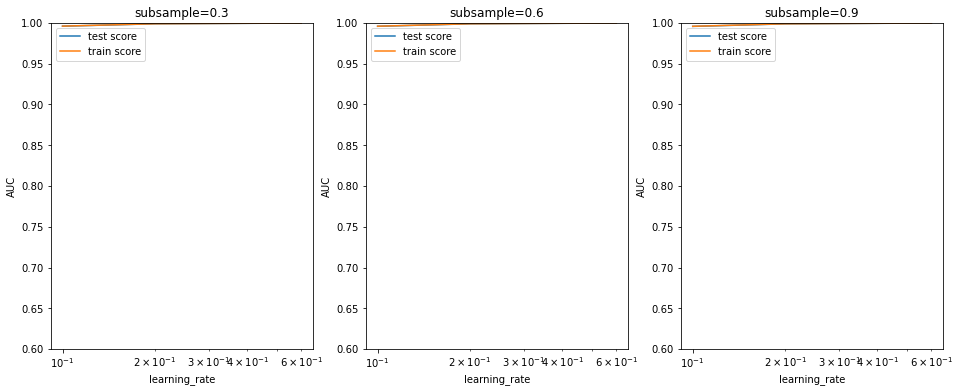

In [368]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 

for n, subsample in enumerate(param_grid['subsample']):
    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results_xgb_adasyn[cv_results_xgb_adasyn['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [369]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv_xgb_adasyn.best_score_,'using',model_cv_xgb_adasyn.best_params_)

We can get accuracy of 0.9998781406865256 using {'learning_rate': 0.6, 'subsample': 0.6}


In [397]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_model_adasyn = XGBClassifier(params = params)
xgb_model_adasyn.fit(X_train_xg_adasyn, y_train_xg_adasyn)

[22:02:23] WARNING: ..\src\learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:02:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [398]:
# predictions  on the train data
predictions = xgb_model_adasyn.predict_proba(X_train_xg_adasyn)[:,1]
predictions

array([1.0145353e-05, 1.0674931e-06, 3.8420721e-06, ..., 9.9834001e-01,
       9.9972969e-01, 9.9966371e-01], dtype=float32)

In [399]:
#creating data frame and a column 
y_train_pred_xg_final = pd.DataFrame({'Fraud':y_train_xg_adasyn.values, 'Fraud_Prob':predictions})
y_train_pred_xg_final['CustID'] = y_train_xg_adasyn.index
y_train_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,1.014535e-05,0
1,0,1.067493e-06,1
2,0,3.842072e-06,2
3,0,2.743327e-06,3
4,0,1.224244e-07,4


In [400]:
y_train_pred_xg_final['predicted'] = y_train_pred_xg_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID,predicted
0,0,1.014535e-05,0,0
1,0,1.067493e-06,1,0
2,0,3.842072e-06,2,0
3,0,2.743327e-06,3,0
4,0,1.224244e-07,4,0


In [401]:
#calling the evalution metric code to see the performance on the train data after deciding a cutoff value
evaluation_metric(y_train_pred_xg_final.Fraud,y_train_pred_xg_final.predicted,y_train_pred_xg_final.Fraud_Prob)

Recall/Sensitivity : 1
confusion metrics :
 [[199020      0]
 [     0 199039]]
Accuracy of model 
 1.0
AUC Score : 1


In [402]:
metrics(y_train_pred_xg_final.Fraud,y_train_pred_xg_final.predicted)

Sensitivity : 1
Specificity : 1
FPR : 0
Positive predictive value : 1
Negative predictive value : 1


```Train data values``` 

```AUC Score``` on the train data : 100%

```Recall/Sensitivity``` on the train data  : 100%

```Specificity``` on the train data  : 100%

```Accuracy``` on the train data : 100%

## Ploting ROC Curve 

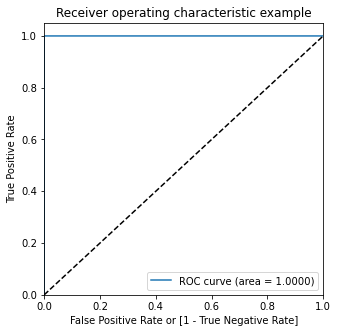

In [403]:
# calling the ROC curve
draw_roc(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.Fraud_Prob)

the area under the curve is high and ROC Area is 1.0 hence we can go with the model

### Finding optimal cutoff

In [404]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_xg_final[i]= y_train_pred_xg_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1.014535e-05,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1.067493e-06,1,0,1,0,0,0,0,0,0,0,0,0
2,0,3.842072e-06,2,0,1,0,0,0,0,0,0,0,0,0
3,0,2.743327e-06,3,0,1,0,0,0,0,0,0,0,0,0
4,0,1.224244e-07,4,0,1,0,0,0,0,0,0,0,0,0


In [405]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_xg_final.Fraud, y_train_pred_xg_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensi     speci
0.0   0.0  0.500024    1.0  0.000000
0.1   0.1  0.999724    1.0  0.999447
0.2   0.2  0.999935    1.0  0.999869
0.3   0.3  0.999990    1.0  0.999980
0.4   0.4  0.999995    1.0  0.999990
0.5   0.5  1.000000    1.0  1.000000
0.6   0.6  1.000000    1.0  1.000000
0.7   0.7  1.000000    1.0  1.000000
0.8   0.8  1.000000    1.0  1.000000
0.9   0.9  1.000000    1.0  1.000000


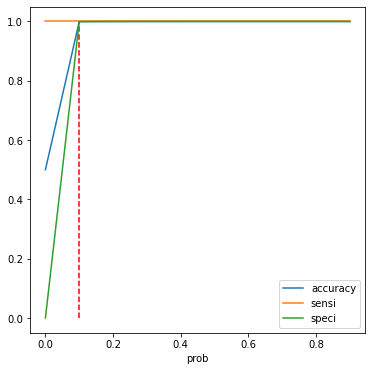

In [406]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],ax=ax)
plt.vlines(x=0.1, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [422]:
# Final cutoff points and predictions by the model 
y_train_pred_xg_final['final_predicted'] = y_train_pred_xg_final.Fraud_Prob.map( lambda x: 1 if x > 0.01 else 0)

y_train_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,1.014535e-05,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.067493e-06,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,3.842072e-06,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,2.743327e-06,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1.224244e-07,4,0,1,0,0,0,0,0,0,0,0,0,0


In [423]:
# Let's check the overall accuracy on the train data after the cutoff value decided.
accuracy_score(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.final_predicted)

0.9965582991466089

In [424]:
#checking the performance
evaluation_metric(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.final_predicted ,y_train_pred_xg_final.Fraud_Prob)

Recall/Sensitivity : 1
confusion metrics :
 [[197650   1370]
 [     0 199039]]
Accuracy of model 
 0.9965582991466089
AUC Score : 1


In [425]:
# calling for confudion matrix
metrics(y_train_pred_xg_final.Fraud, y_train_pred_xg_final.final_predicted)

Sensitivity : 1
Specificity : 0.9931
FPR : 0.006884
Positive predictive value : 0.9932
Negative predictive value : 1


```On training data```

```AUC Score``` on the train data after deciding the cutoff: 100%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 100%

```Specificity``` on the train data after deciding the cutoff : 99.31%

```Accuracy``` on the train data after deciding the cutoff: 99.65%

### Predictions on test data

In [426]:
# predicts the fraud probability for test data
y_test_pred_xg_prob =  xgb_model_adasyn.predict_proba(X_test_xg_adasyn)[:,1]

y_test_pred_xg_final = pd.DataFrame({'Fraud':y_test_xg_adasyn.values, 'Fraud_Prob':y_test_pred_xg_prob})
y_test_pred_xg_final['CustID'] = y_test_xg_adasyn.index
y_test_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID
0,0,3.512658e-05,130092
1,0,1.393661e-03,97022
2,0,1.218232e-05,242048
3,0,4.639836e-08,192560
4,0,2.559161e-05,236096


In [427]:
# FInal cutoff points and predictions by the model
y_test_pred_xg_final['final_predicted'] = y_test_pred_xg_final.Fraud_Prob.map( lambda x: 1 if x > 0.01 else 0)

y_test_pred_xg_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,3.512658e-05,130092,0
1,0,1.393661e-03,97022,0
2,0,1.218232e-05,242048,0
3,0,4.639836e-08,192560,0
4,0,2.559161e-05,236096,0


In [428]:
#checking the performance on the test data
evaluation_metric(y_test_pred_xg_final.Fraud,y_test_pred_xg_final.final_predicted,y_test_pred_xg_final.Fraud_Prob)

Recall/Sensitivity : 0.8784
confusion metrics :
 [[84561   734]
 [   18   130]]
Accuracy of model 
 0.9911988109031752
AUC Score : 0.9826


In [429]:
#checkingbthe performance mterics on the test data
metrics(y_test_pred_xg_final.Fraud, y_test_pred_xg_final.final_predicted)

Sensitivity : 0.8784
Specificity : 0.9914
FPR : 0.008605
Positive predictive value : 0.1505
Negative predictive value : 0.9998


```XGBoost Model summary```

- `Train set`

 - Accuracy = 99.65%
 - Sensitivity = 100%
 - Specificity = 99.31%
 - ROC-AUC = 100%

- `Test set`
 - Accuracy = 95.11%
 - Sensitivity = 87.84%
 - Specificity = 99.14%
 - ROC-AUC = 98.26%

# Random Forest Using ADASYN Technique

In [531]:
# making  a copy

X_train_rf_adasyn = X_train_adasyn.copy() 
y_train_rf_adasyn = y_train_adasyn.copy()
X_test_rf_adasyn = X_test_adasyn.copy()
y_test_rf_adasyn = y_test_adasyn.copy()

#X_test_rf_adasyn = X_test.copy()
#y_test_rf_adasyn = y_test.copy()


print(X_train_rf_adasyn.shape)
print(y_train_rf_adasyn.shape)
print(X_test_rf_adasyn.shape)
print(y_test_rf_adasyn.shape)


(398059, 29)
(398059,)
(170605, 29)
(170605,)


In [432]:
#initializing
rfc = RandomForestClassifier()
#without any hyper parameters building model
rfc.fit(X_train_rf_adasyn,y_train_rf_adasyn)

RandomForestClassifier()

In [433]:
#predicting the performance before hypertunning
predictions = rfc.predict(X_train_rf_adasyn)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [435]:
#performance on the test data
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_rf_adasyn, predictions))
print('confusion metrics :\n' , confusion_matrix(y_train_rf_adasyn, predictions))
print('Accuracy of model \n',accuracy_score(y_train_rf_adasyn, predictions))
print("AUC Score : %.4g" % roc_auc_score(y_train_rf_adasyn, rfc.predict_proba(X_train_rf_adasyn)[:,1]))


Recall/Sensitivity : 1
confusion metrics :
 [[199020      0]
 [     0 199039]]
Accuracy of model 
 1.0
AUC Score : 1


In [436]:
#classification report
print("Calssification Report:\n", classification_report(y_train_rf_adasyn,predictions))

Calssification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199039

    accuracy                           1.00    398059
   macro avg       1.00      1.00      1.00    398059
weighted avg       1.00      1.00      1.00    398059



In [441]:
# prediction on testset
y_test_pred = rfc.predict(X_test_rf_adasyn)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [442]:
evaluation_metric(y_test_rf_adasyn, y_test_pred,rfc.predict_proba(X_test_rf_adasyn)[:,1])

Recall/Sensitivity : 0.8243
confusion metrics :
 [[85273    22]
 [   26   122]]
Accuracy of model 
 0.9994382219725431
AUC Score : 0.9767


since by using the default parameter the model is overfitting hence lets tune the hyperparameters to get a good model

## Hyper parameter tuning

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [444]:
# specifying n_folds
n_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4) #5

#parameters to build model on
parameters = { "max_depth" : range(2,20,5)}

rf = RandomForestClassifier()

rf_adasyn = GridSearchCV(rf,parameters,
                     cv = n_folds,
                     scoring = "roc_auc",
                     n_jobs=-1,
                     verbose=3,
                     return_train_score = True)
rf_adasyn.fit(X_train_rf_adasyn,y_train_rf_adasyn)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:  1.3min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  5.2min remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  8.1min remaining:   54.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='roc_auc', verbose=3)

In [445]:
#results on tunning the model with max_depth
scores = rf_adasyn.cv_results_

In [446]:
#dataframe of results after tunning max_depth
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,71.342535,0.781682,0.794064,0.023973,2,{'max_depth': 2},0.925511,0.929900,0.928967,0.927868,...,0.928892,0.002216,4,0.926089,0.928722,0.929516,0.926829,0.934034,0.929038,2.787976e-03
1,212.624503,0.912249,1.104445,0.020396,7,{'max_depth': 7},0.995018,0.993879,0.994036,0.995140,...,0.994518,0.000505,3,0.994953,0.993993,0.994277,0.995247,0.994810,0.994656,4.570693e-04
2,295.250222,8.191582,1.215550,0.062798,12,{'max_depth': 12},0.999905,0.999875,0.999890,0.999905,...,0.999900,0.000016,2,0.999937,0.999947,0.999948,0.999941,0.999947,0.999944,4.160677e-06
3,287.871347,30.299585,1.037323,0.206937,17,{'max_depth': 17},0.999978,0.999978,0.999973,0.999998,...,0.999985,0.000010,1,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,2.226639e-07


<Figure size 1080x1080 with 0 Axes>

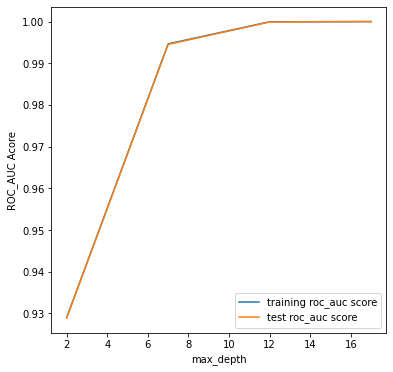

In [448]:
# plotting accuracies with max_depth
plt.figure()
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_depth")
plt.ylabel("ROC_AUC Acore")
plt.legend()
plt.show()

we can see that best ```max_depth``` is between ```7 to 13```

# Tunning  n_estimators

In [459]:
# specifying n_folds
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

#parameters to build model on
parameters = { "n_estimators" : range(100,400,100)}

rf = RandomForestClassifier(max_depth = 13)

rf_adasyn = GridSearchCV(rf,parameters,
                 cv = n_folds,
                 scoring = "roc_auc",
                  n_jobs=-1,
                  verbose=3,
                 return_train_score = True)
rf_adasyn.fit(X_train_rf_adasyn,y_train_rf_adasyn)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:  3.5min remaining: 12.2min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  5.9min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  7.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(max_depth=13), n_jobs=-1,
             param_grid={'n_estimators': range(100, 400, 100)},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [460]:
#scores of the model after tunning the model on the n_estimators  
scores = rf_adasyn.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,201.176160,0.364942,1.703774,0.031762,100,{'n_estimators': 100},0.999943,0.999931,0.999962,0.999945,0.000013,3,0.999985,0.999982,0.999980,0.999982,0.000002
1,339.567997,3.490775,2.735015,0.044073,200,{'n_estimators': 200},0.999953,0.999930,0.999961,0.999948,0.000013,2,0.999981,0.999988,0.999983,0.999984,0.000003
2,451.722079,0.304329,3.464396,0.014665,300,{'n_estimators': 300},0.999955,0.999928,0.999963,0.999949,0.000015,1,0.999979,0.999985,0.999985,0.999983,0.000003


<Figure size 1080x1080 with 0 Axes>

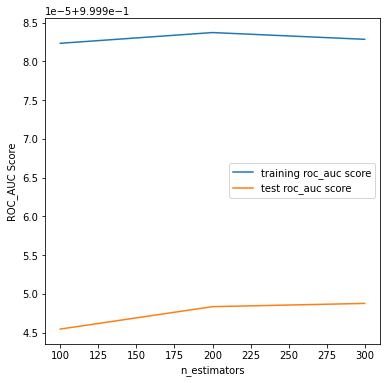

In [461]:
# plotting accuracies with n_estimators
plt.figure()
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("n_estimators")
plt.ylabel("ROC_AUC Score")
plt.legend()
plt.show()

we can that best ```n_estimtor``` is between ```200 t0 300```

# Tunning min_sample_leaf 

In [462]:
#number of fold
n_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

#parameters the model build on
parameters = {"min_samples_leaf": range(50,300,50)}

rf = RandomForestClassifier(max_depth = 13)

rf_adasyn = GridSearchCV(rf,parameters,
                cv = n_folds,
                 scoring="roc_auc", 
                  n_jobs=-1,
                  verbose=3,
                 return_train_score = True)
rf_adasyn.fit(X_train_rf_adasyn,y_train_rf_adasyn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  4.3min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  8.5min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 10.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(max_depth=13), n_jobs=-1,
             param_grid={'min_samples_leaf': range(50, 300, 50)},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [463]:
# scores of GridSearch CV
scores = rf_adasyn.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,250.729372,1.704054,1.275388,0.065780,50,{'min_samples_leaf': 50},0.999910,0.999835,0.999895,0.999904,...,0.999885,0.000027,1,0.999917,0.999912,0.999919,0.999899,0.999909,0.999911,0.000007
1,247.340240,1.343790,1.195801,0.037038,100,{'min_samples_leaf': 100},0.999873,0.999776,0.999828,0.999858,...,0.999828,0.000035,2,0.999860,0.999861,0.999870,0.999858,0.999855,0.999861,0.000005
2,245.286335,3.020582,1.172064,0.062093,150,{'min_samples_leaf': 150},0.999840,0.999732,0.999790,0.999786,...,0.999784,0.000035,3,0.999809,0.999823,0.999810,0.999801,0.999816,0.999812,0.000007
3,244.376371,1.356934,1.213553,0.062042,200,{'min_samples_leaf': 200},0.999793,0.999685,0.999716,0.999722,...,0.999728,0.000035,4,0.999754,0.999779,0.999734,0.999730,0.999772,0.999754,0.000020
4,216.963512,49.947956,1.120609,0.250109,250,{'min_samples_leaf': 250},0.999764,0.999593,0.999668,0.999655,...,0.999664,0.000056,5,0.999706,0.999700,0.999694,0.999689,0.999692,0.999696,0.000006


<Figure size 1080x1080 with 0 Axes>

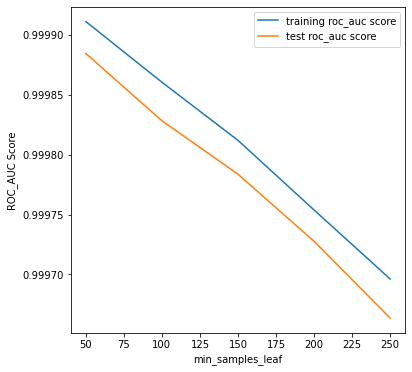

In [464]:
#plotting accuracies with min_samples_leaf
plt.figure()
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("min_samples_leaf")
plt.ylabel("ROC_AUC Score")
plt.legend()
plt.show()

we can see  best ```min_samples_leaf``` are at lower values, so lets take range between 50 to 75

# Max Feature Tuning

In [468]:
# GridSearchCV to find optimal max_features


# specify number of folds for k-fold CV
n_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=13)


# fit tree on training data
rf_adasyn = GridSearchCV(rf, parameters, 
                         cv=n_folds, 
                         scoring="roc_auc",
                         n_jobs=-1,
                         verbose=3,
                         return_train_score=True)
rf_adasyn.fit(X_train_rf_adasyn, y_train_rf_adasyn)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed: 12.4min remaining: 15.7min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed: 23.2min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 29.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(max_depth=13), n_jobs=-1,
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [469]:
# scores of GridSearch CV
scores = rf_adasyn.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,211.270945,0.638454,1.242475,0.032881,4,{'max_features': 4},0.999958,0.999929,0.999958,0.999960,...,0.999953,0.000013,1,0.999978,0.999987,0.999989,0.999980,0.999983,0.999983,0.000004
1,420.733526,2.804429,1.477447,0.305825,8,{'max_features': 8},0.999932,0.999912,0.999929,0.999943,...,0.999932,0.000012,2,0.999964,0.999975,0.999976,0.999961,0.999977,0.999970,0.000007
2,736.529812,1.874464,1.095070,0.014927,14,{'max_features': 14},0.999885,0.999839,0.999826,0.999882,...,0.999872,0.000036,3,0.999865,0.999934,0.999914,0.999907,0.999901,0.999904,0.000023
3,972.243375,19.203460,1.014885,0.067289,20,{'max_features': 20},0.999853,0.999739,0.999751,0.999813,...,0.999789,0.000041,4,0.999816,0.999845,0.999838,0.999819,0.999783,0.999820,0.000022
4,974.515409,93.375596,0.665029,0.040436,24,{'max_features': 24},0.999681,0.999518,0.999664,0.999722,...,0.999649,0.000069,5,0.999646,0.999655,0.999738,0.999726,0.999654,0.999684,0.000040


<Figure size 1080x1080 with 0 Axes>

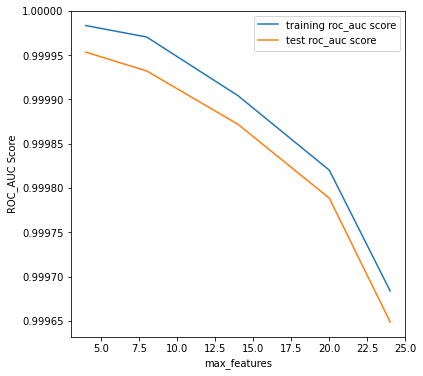

In [470]:
# plotting accuracies with max_features
plt.figure()
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc_auc score")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc_auc score")
plt.xlabel("max_features")
plt.ylabel("ROC_AUC Score")
plt.legend()
plt.show()

we can see best ```max_features``` are between 5 to 9

# Grid Search To Find Optimal HyperParameters

In [471]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7,8,13],
    'min_samples_leaf': range(50, 200, 30),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,200,300], 
    'max_features': [4,7,10,12,15]
}
# Create a based model
c = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_adasyn = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = c, n_jobs = -1,verbose = 3)
grid_search_adasyn.fit(X_train_rf_adasyn,y_train_rf_adasyn)

Fitting 3 folds for each of 675 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed: 113.9min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 292.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 518.3min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 769.7min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed: 1124.5min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed: 1742.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 8, 13],
                         'max_features': [4, 7, 10, 12, 15],
                         'min_samples_leaf': range(50, 200, 30),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [473]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search_adasyn.best_score_,'using',grid_search_adasyn.best_params_)

We can get accuracy of 0.9979827109983263 using {'max_depth': 13, 'max_features': 4, 'min_samples_leaf': 50, 'min_samples_split': 200, 'n_estimators': 200}


we get a accuracy of 99.79% using following parameter values:

- `max_depth` : 13
- `max_features` : 4
- `min_samples_leaf` : 50
- `min_samples_split` : 200
- `n_estimators` : 200

In [474]:
#number of folds
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

#rf = RandomForestClassifier()

#final RandomForestClasssifier model with all parameters
final_rfc_adasyn = RandomForestClassifier(bootstrap=True,
                                      max_depth=13,
                                      min_samples_leaf=50, 
                                      min_samples_split=200,
                                      max_features=4,
                                      n_estimators=200,
                                      n_jobs = -1,
                                      verbose = 3 ,
                                      class_weight="balanced",
                                      random_state=100)
#fittingbthe model on the final model built 
final_rfc_adasyn.fit(X_train_rf_adasyn,y_train_rf_adasyn)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.6s


building tree 20 of 200
building tree 21 of 200building tree 22 of 200

building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   31.2s


building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   58.7s finished


RandomForestClassifier(class_weight='balanced', max_depth=13, max_features=4,
                       min_samples_leaf=50, min_samples_split=200,
                       n_estimators=200, n_jobs=-1, random_state=100,
                       verbose=3)

In [475]:
# predictions  on the train data
predictions = final_rfc_adasyn.predict_proba(X_train_rf_adasyn)[:,1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.7s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    1.4s finished


In [476]:
#predited array values
predictions

array([0.1469914 , 0.02529138, 0.00451003, ..., 0.76885717, 0.85986035,
       0.91271649])

In [477]:
#creating data frame and a column 
y_train_pred_rf_final = pd.DataFrame({'Fraud':y_train_rf_adasyn.values, 'Fraud_Prob':predictions})
y_train_pred_rf_final['CustID'] = y_train_rf_adasyn.index
y_train_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID
0,0,0.146991,0
1,0,0.025291,1
2,0,0.004510,2
3,0,0.046733,3
4,0,0.043623,4


In [478]:
y_train_pred_rf_final['predicted'] = y_train_pred_rf_final.Fraud_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_rf_final.head()


,Fraud,Fraud_Prob,CustID,predicted
0,0,0.146991,0,0
1,0,0.025291,1,0
2,0,0.004510,2,0
3,0,0.046733,3,0
4,0,0.043623,4,0


In [479]:
#calling the evalution metric code to see the performance on the train data after deciding a cutoff value
evaluation_metric(y_train_pred_rf_final.Fraud,y_train_pred_rf_final.predicted,y_train_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 0.9995
confusion metrics :
 [[198479    541]
 [   101 198938]]
Accuracy of model 
 0.9983871737606737
AUC Score : 0.9999


In [480]:
metrics(y_train_pred_rf_final.Fraud,y_train_pred_rf_final.predicted)

Sensitivity : 0.9995
Specificity : 0.9973
FPR : 0.002718
Positive predictive value : 0.9973
Negative predictive value : 0.9995


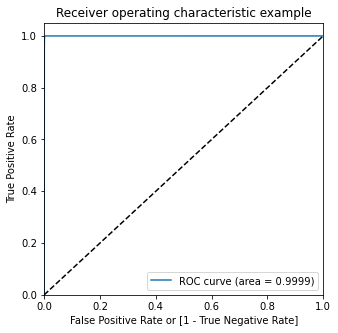

In [481]:
# calling the ROC curve
draw_roc(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.Fraud_Prob)

```On blanced dataset using ADASYN RandomForest```

```AUC Score``` on the train data : 99.99%

```Recall/Sensitivity``` on the train data : 99.95%

```Specificity``` on the train data : 99.73%

```Accuracy``` on the train data : 99.83%

### Finding optimal cutoff

In [482]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_rf_final[i]= y_train_pred_rf_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.146991,0,0,1,1,0,0,0,0,0,0,0,0
1,0,0.025291,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.004510,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.046733,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.043623,4,0,1,0,0,0,0,0,0,0,0,0


In [483]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_rf_final.Fraud, y_train_pred_rf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500024  1.000000  0.000000
0.1   0.1  0.942041  1.000000  0.884077
0.2   0.2  0.982246  1.000000  0.964491
0.3   0.3  0.992501  1.000000  0.985002
0.4   0.4  0.996674  1.000000  0.993347
0.5   0.5  0.998387  0.999493  0.997282
0.6   0.6  0.997591  0.996453  0.998729
0.7   0.7  0.989790  0.980265  0.999317
0.8   0.8  0.976898  0.954220  0.999578
0.9   0.9  0.929943  0.860063  0.999829


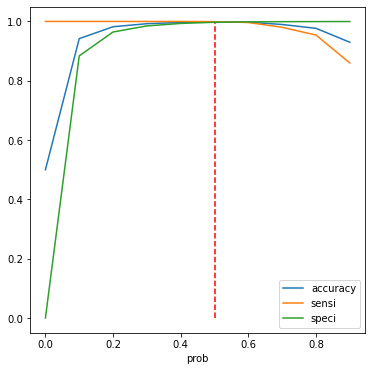

In [485]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
fig_dims = (6,6)
fig, ax = plt.subplots(figsize=fig_dims)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], ax=ax)
plt.vlines(x=0.5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [515]:
# Final cutoff points and predictions by the model 
y_train_pred_rf_final['final_predicted'] = y_train_pred_rf_final.Fraud_Prob.map( lambda x: 1 if x > 0.12 else 0)

y_train_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.146991,0,0,1,1,0,0,0,0,0,0,0,0,1
1,0,0.025291,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.004510,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.046733,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.043623,4,0,1,0,0,0,0,0,0,0,0,0,0


In [516]:
# Let's check the overall accuracy on the train data after the cutoff value decided.
accuracy_score(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.final_predicted)

0.9565416182023267

In [517]:
#checking the performance
evaluation_metric(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.final_predicted ,y_train_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 1
confusion metrics :
 [[181721  17299]
 [     0 199039]]
Accuracy of model 
 0.9565416182023267
AUC Score : 0.9999


In [518]:
# calling for confudion matrix
metrics(y_train_pred_rf_final.Fraud, y_train_pred_rf_final.final_predicted)

Sensitivity : 1
Specificity : 0.9131
FPR : 0.08692
Positive predictive value : 0.92
Negative predictive value : 1


```On blanced dataset using ADASYN RandomForest ```

```AUC Score``` on the train data : 99.99%

```Recall/Sensitivity``` on the train data : 100%

```Specificity``` on the train data : 98.5%

```Accuracy``` on the train data : 99.25%

### Predictions on test data

In [532]:
# predicts the fraud probability for test data
y_test_pred_rf_prob =  final_rfc_adasyn.predict_proba(X_test_rf_adasyn)[:,1]

y_test_pred_rf_final = pd.DataFrame({'Fraud':y_test_rf_adasyn.values, 'Fraud_Prob':y_test_pred_rf_prob})
y_test_pred_rf_final['CustID'] = y_test_rf_adasyn.index
y_test_pred_rf_final.head()

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.5s finished


,Fraud,Fraud_Prob,CustID
0,0,0.113873,0
1,0,0.230488,1
2,0,0.008609,2
3,0,0.006389,3
4,0,0.084298,4


In [533]:
# FInal cutoff points and predictions by the model
y_test_pred_rf_final['final_predicted'] = y_test_pred_rf_final.Fraud_Prob.map( lambda x: 1 if x > 0.12 else 0)

y_test_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,0.113873,0,0
1,0,0.230488,1,1
2,0,0.008609,2,0
3,0,0.006389,3,0
4,0,0.084298,4,0


In [534]:
#checking the performance on the test data
evaluation_metric(y_test_pred_rf_final.Fraud,y_test_pred_rf_final.final_predicted,y_test_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 0.9484
confusion metrics :
 [[77665  7630]
 [ 4406 80904]]
Accuracy of model 
 0.9294510711878315
AUC Score : 0.981


In [535]:
#checkingbthe performance mterics on the test data
metrics(y_test_pred_rf_final.Fraud, y_test_pred_rf_final.final_predicted)

Sensitivity : 0.9484
Specificity : 0.9105
FPR : 0.08945
Positive predictive value : 0.9138
Negative predictive value : 0.9463


```On blanced dataset using smote```

```AUC Score``` on the test data : 98.1%

```Recall/Sensitivity``` on the test data : 94.84%

```Specificity``` on the test data : 91.05%

```Accuracy``` on the test data : 92.94%

## Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [522]:
#number of folds
n_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)

#rf = RandomForestClassifier()

#final RandomForestClasssifier model with all parameters
clf = RandomForestClassifier(bootstrap=True,
                                      max_depth=13,
                                      min_samples_leaf=50, 
                                      min_samples_split=200,
                                      max_features=4,
                                      n_estimators=200,
                                      n_jobs = -1,
                                      verbose = 3 ,
                                      class_weight="balanced",
                                      random_state=100)
#fittingbthe model on the final model built 
clf.fit(X_train_rf_adasyn,y_train_rf_adasyn)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.7s


building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   31.9s


building tree 117 of 200
building tree 118 of 200
building tree 119 of 200
building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200building tree 127 of 200

building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   59.1s finished


RandomForestClassifier(class_weight='balanced', max_depth=13, max_features=4,
                       min_samples_leaf=50, min_samples_split=200,
                       n_estimators=200, n_jobs=-1, random_state=100,
                       verbose=3)

In [536]:
# predicts the fraud probability for test data
y_test_pred_rf_prob =  clf.predict_proba(X_test_rf_adasyn)[:,1]

y_test_pred_rf_final = pd.DataFrame({'Fraud':y_test_rf_adasyn.values, 'Fraud_Prob':y_test_pred_rf_prob})
y_test_pred_rf_final['CustID'] = y_test_rf_adasyn.index
y_test_pred_rf_final.head()

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 200 out of 200 | elapsed:    0.6s finished


,Fraud,Fraud_Prob,CustID
0,0,0.113873,0
1,0,0.230488,1
2,0,0.008609,2
3,0,0.006389,3
4,0,0.084298,4


In [537]:
# FInal cutoff points and predictions by the model
y_test_pred_rf_final['final_predicted'] = y_test_pred_rf_final.Fraud_Prob.map( lambda x: 1 if x > 0.12 else 0)

y_test_pred_rf_final.head()

,Fraud,Fraud_Prob,CustID,final_predicted
0,0,0.113873,0,0
1,0,0.230488,1,1
2,0,0.008609,2,0
3,0,0.006389,3,0
4,0,0.084298,4,0


In [538]:
#checking the performance on the test data
evaluation_metric(y_test_pred_rf_final.Fraud,y_test_pred_rf_final.final_predicted,y_test_pred_rf_final.Fraud_Prob)

Recall/Sensitivity : 0.9484
confusion metrics :
 [[77665  7630]
 [ 4406 80904]]
Accuracy of model 
 0.9294510711878315
AUC Score : 0.981


In [539]:
#checkingbthe performance mterics on the test data
metrics(y_test_pred_rf_final.Fraud, y_test_pred_rf_final.final_predicted)

Sensitivity : 0.9484
Specificity : 0.9105
FPR : 0.08945
Positive predictive value : 0.9138
Negative predictive value : 0.9463


```On blanced dataset using ADASYN best model reults for test data```

```AUC Score``` on the test data : 98.1%

```Recall/Sensitivity``` on the test data : 94.84%

```Specificity``` on the test data : 91.38%

```Accuracy``` on the test data : 92.95%

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 17


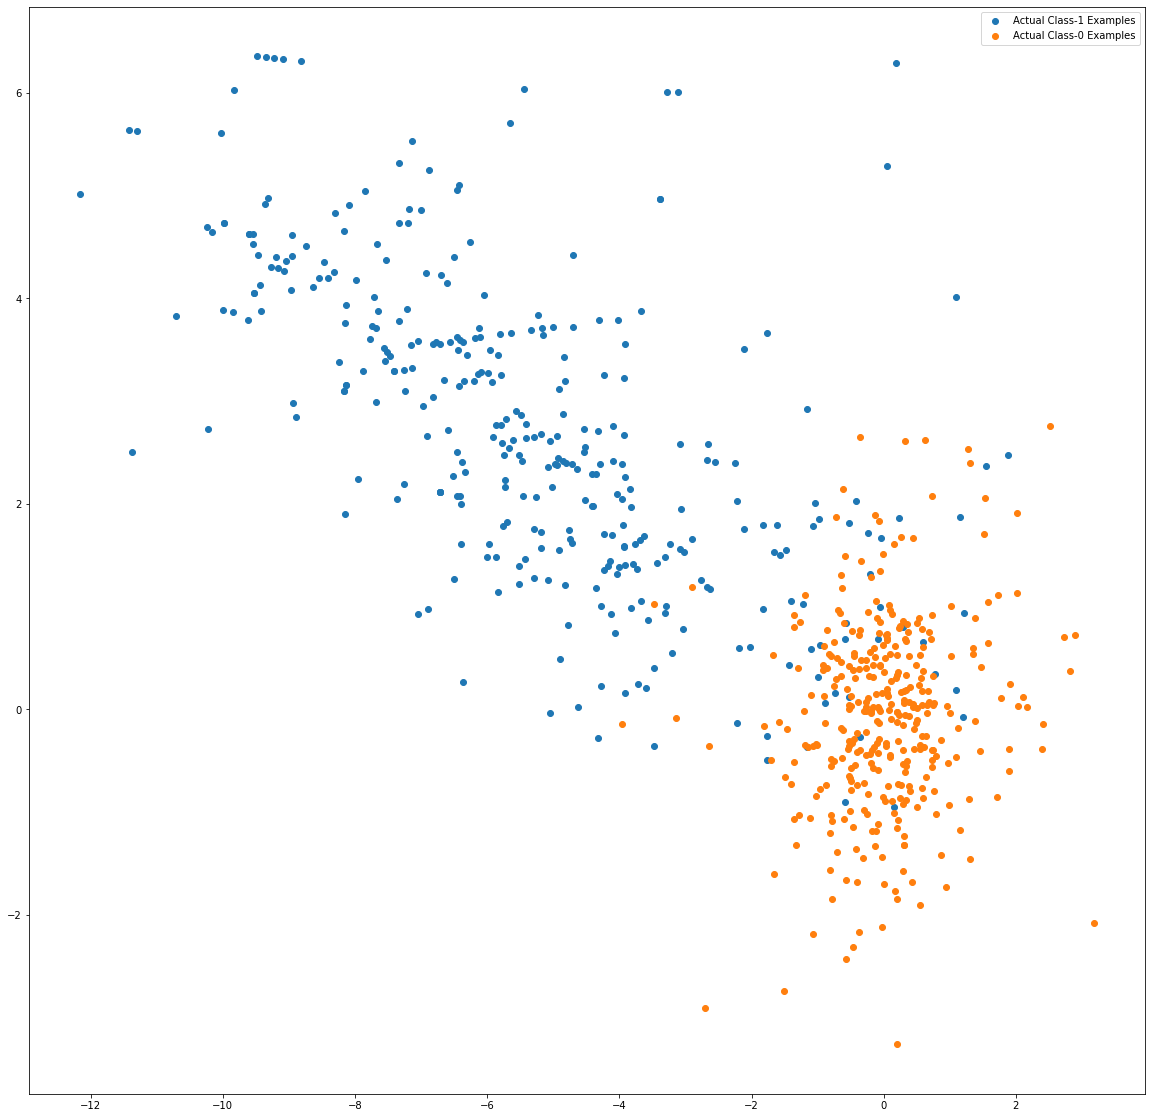

In [540]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()